# A very quick introduction to Automatic Differention and Gradient Descent

## Example: using Gradient Descent to solve a Linear Regression Problem

## IADS Summer School, 2nd August 2022

### Dr Michael Fairbank, University of Essex, UK

- Email: m.fairbank@essex.ac.uk
- This is Jupyter Notebook 1.1 of the course

## Build a scatter diagram

- First build some datapoints for a simple linear regression example...

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# dataset for a simple regression problem (1 input 1 output):
dataset_size=10
noise_level=1
np.random.seed(1) # Seed the random number generator so the whole class have consistent results
x_train=(np.random.rand(dataset_size,1)*5+2).astype(np.float32)
y_train=(3*x_train+1+np.random.normal(scale=noise_level, size=(dataset_size,1))).astype(np.float32)

In [2]:
print("x_train",x_train.shape, x_train)
print("y_train",y_train.shape, y_train)

x_train (10, 1) [[4.08511  ]
 [5.6016226]
 [2.000572 ]
 [3.511663 ]
 [2.7337794]
 [2.461693 ]
 [2.931301 ]
 [3.7278037]
 [3.9838374]
 [4.6940837]]
y_train (10, 1) [[15.000143 ]
 [17.04366  ]
 [ 7.3207545]
 [11.285618 ]
 [10.663445 ]
 [ 6.324939 ]
 [ 9.471486 ]
 [11.799356 ]
 [14.085281 ]
 [13.982359 ]]


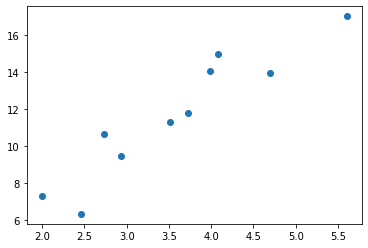

In [3]:
# show training set
plt.scatter(x_train, y_train)

## Build a linear regression model
- We will build a linear regression model $y=wx+b$ to try to fit the data.  
- We don't know what $w$ and $b$ are yet though.

In [4]:
import tensorflow as tf

w=tf.Variable(0.0, tf.float32)
b=tf.Variable(0.0, tf.float32)

def model(x):
    return x*w+b
print(model(x_train))

tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)


Let's show how our model depends upon $w$:

In [5]:
w.assign(0.1)
print(model(x_train))

tf.Tensor(
[[0.408511  ]
 [0.56016225]
 [0.2000572 ]
 [0.3511663 ]
 [0.27337795]
 [0.24616931]
 [0.29313013]
 [0.37278038]
 [0.39838374]
 [0.46940836]], shape=(10, 1), dtype=float32)


- In the cell below, try to print what the model outputs given input x=0.65.
    - **Try This** (Check: we should get 0.065)
    
- Remember in Jupyter Notebooks you can use "menu:cell:run cells" to run the currently highlighted cells.
        - the same can be achieved with ctrl+Enter
    - Also in Jupyter, in some notebooks you might need to "Menu:Cell:run all" to refresh all variables in the correct order
        - or even use "Kernel: Restart and run all"

In [7]:
# TODO put some code here
print(model(0.65))


tf.Tensor(0.065, shape=(), dtype=float32)


- **Try This**: Change b to 0.2 and evaluate the model given input x=0.65

In [8]:
# TODO put some code here
b.assign(0.2)
print(model(0.65))

tf.Tensor(0.265, shape=(), dtype=float32)


### Define a "loss function" 
- To apply gradient descent, we need to define a loss function.
- This loss function calculates how well the model is doing
- We will manually encode the mean-squared error

In [9]:
def loss_function(x,y):
    return tf.reduce_mean(tf.square(model(x)-y))
print(loss_function(x_train, y_train))

tf.Tensor(133.95712, shape=(), dtype=float32)


- **Try this:**
    - In the cell below, evaluate the loss function when x=1 and the output is supposedly 4.
    - Compare this to the actual model output when x=1

In [12]:
# TODO put some code here
print(loss_function(1, 4))
print(model(1))
print (3.7**2)

tf.Tensor(13.690001, shape=(), dtype=float32)
tf.Tensor(0.3, shape=(), dtype=float32)
13.690000000000001


### Use Automatic Differentiation

- Automatic differention is one of the amazing things about tensorflow, which allows Keras to build and train neural networks very easily.  
- It uses "backpropagation" to compute the necessary gradients.
- Here we'll use it to compute the gradient of the loss function with respect to $w$ and $b$

In [13]:
with tf.GradientTape() as tape:

    # Run the forward pass of the layer.
    # The operations that the layer applies
    # to its inputs are going to be recorded
    # on the GradientTape.
    L=loss_function(x_train, y_train)
print("L",L.numpy())
grads = tape.gradient(L, [w,b])
print("w,b",w.numpy(),b.numpy())
print("dL/dw",grads[0].numpy())
print("dL/db",grads[1].numpy())


L 133.95712
w,b 0.1 0.2
dL/dw -85.65322
dL/db -22.28078


### Apply an iteration of "gradient descent"
If we aim to improve $L$ a tiny bit then we can use the following two updates:
- $w \leftarrow w-\eta \frac{\partial L}{\partial w}$
- $b \leftarrow b-\eta \frac{\partial L}{\partial b}$

where $\eta>0$ is any small number we choose.

This is what is meant by "gradient descent".

In [14]:
eta=0.001
w.assign(w-eta*grads[0])
b.assign(b-eta*grads[1])
print("w,b",w.numpy(),b.numpy())
L=loss_function(x_train, y_train)
print("L",L.numpy())

w,b 0.18565322 0.22228079
L 126.23983


### Iteratively apply gradient descent

- Run the code block below serveral times and see what $w$ and $b$ converge to.  
    - In Jupyter, Click ctrl+enter to run a block.
- **Extra Challenge:** Try to wrap the code block below into a python "for loop" to run 10000 times.

In [22]:
with tf.GradientTape() as tape:
    L=loss_function(x_train, y_train)
grads = tape.gradient(L, [w,b])

eta=0.001
w.assign(w-eta*grads[0])
b.assign(b-eta*grads[1])
print("w,b",w.numpy(),b.numpy())
new_L=tf.reduce_mean(tf.square(model(x_train)-y_train))
print("new_L",new_L.numpy(),". Old L",L.numpy())

w,b 0.78584087 0.37844542
new_L 78.649826 . Old L 83.42778


In [24]:
for i in range (10000):
    with tf.GradientTape() as tape:
        L=loss_function(x_train, y_train)
    grads = tape.gradient(L, [w,b])

    eta=0.001
    w.assign(w-eta*grads[0])
    b.assign(b-eta*grads[1])
    print("Iteration ", i, "w,b",w.numpy(),b.numpy())
    new_L=tf.reduce_mean(tf.square(model(x_train)-y_train))
    print("new_L",new_L.numpy(),". Old L",L.numpy())

Itetation  0 w,b 2.9506068 1.150364
new_L 1.2869227 . Old L 1.2869221
Itetation  1 w,b 2.9506047 1.1503729
new_L 1.2869227 . Old L 1.2869227
Itetation  2 w,b 2.9506023 1.1503817
new_L 1.2869225 . Old L 1.2869227
Itetation  3 w,b 2.9506 1.1503905
new_L 1.286922 . Old L 1.2869225
Itetation  4 w,b 2.9505978 1.1503993
new_L 1.2869223 . Old L 1.286922
Itetation  5 w,b 2.9505954 1.1504081
new_L 1.2869223 . Old L 1.2869223
Itetation  6 w,b 2.9505932 1.150417
new_L 1.2869221 . Old L 1.2869223
Itetation  7 w,b 2.9505908 1.1504258
new_L 1.2869222 . Old L 1.2869221
Itetation  8 w,b 2.9505887 1.1504346
new_L 1.286922 . Old L 1.2869222
Itetation  9 w,b 2.9505863 1.1504434
new_L 1.286922 . Old L 1.286922
Itetation  10 w,b 2.9505842 1.1504523
new_L 1.286922 . Old L 1.286922
Itetation  11 w,b 2.9505818 1.1504611
new_L 1.286922 . Old L 1.286922
Itetation  12 w,b 2.9505794 1.1504699
new_L 1.2869217 . Old L 1.286922
Itetation  13 w,b 2.9505773 1.1504787
new_L 1.2869216 . Old L 1.2869217
Itetation  14 w,b

Itetation  128 w,b 2.9503193 1.1514764
new_L 1.2869122 . Old L 1.2869121
Itetation  129 w,b 2.9503171 1.151485
new_L 1.2869126 . Old L 1.2869122
Itetation  130 w,b 2.950315 1.1514935
new_L 1.2869111 . Old L 1.2869126
Itetation  131 w,b 2.9503129 1.1515021
new_L 1.2869116 . Old L 1.2869111
Itetation  132 w,b 2.9503107 1.1515107
new_L 1.2869121 . Old L 1.2869116
Itetation  133 w,b 2.9503083 1.1515193
new_L 1.2869114 . Old L 1.2869121
Itetation  134 w,b 2.9503062 1.1515279
new_L 1.2869117 . Old L 1.2869114
Itetation  135 w,b 2.950304 1.1515365
new_L 1.2869123 . Old L 1.2869117
Itetation  136 w,b 2.9503016 1.151545
new_L 1.2869117 . Old L 1.2869123
Itetation  137 w,b 2.9502995 1.1515536
new_L 1.2869118 . Old L 1.2869117
Itetation  138 w,b 2.950297 1.1515622
new_L 1.286911 . Old L 1.2869118
Itetation  139 w,b 2.950295 1.1515708
new_L 1.2869112 . Old L 1.286911
Itetation  140 w,b 2.9502928 1.1515794
new_L 1.2869117 . Old L 1.2869112
Itetation  141 w,b 2.9502907 1.151588
new_L 1.2869117 . Old

Itetation  249 w,b 2.950053 1.1525081
new_L 1.2869027 . Old L 1.2869027
Itetation  250 w,b 2.9500508 1.1525166
new_L 1.2869033 . Old L 1.2869027
Itetation  251 w,b 2.9500484 1.1525251
new_L 1.2869027 . Old L 1.2869033
Itetation  252 w,b 2.9500463 1.1525335
new_L 1.2869028 . Old L 1.2869027
Itetation  253 w,b 2.9500442 1.152542
new_L 1.2869027 . Old L 1.2869028
Itetation  254 w,b 2.950042 1.1525505
new_L 1.2869022 . Old L 1.2869027
Itetation  255 w,b 2.9500399 1.1525589
new_L 1.2869023 . Old L 1.2869022
Itetation  256 w,b 2.9500375 1.1525674
new_L 1.2869017 . Old L 1.2869023
Itetation  257 w,b 2.9500353 1.1525759
new_L 1.2869024 . Old L 1.2869017
Itetation  258 w,b 2.9500332 1.1525843
new_L 1.2869022 . Old L 1.2869024
Itetation  259 w,b 2.950031 1.1525928
new_L 1.2869022 . Old L 1.2869022
Itetation  260 w,b 2.950029 1.1526012
new_L 1.2869017 . Old L 1.2869022
Itetation  261 w,b 2.9500268 1.1526097
new_L 1.2869017 . Old L 1.2869017
Itetation  262 w,b 2.9500244 1.1526182
new_L 1.2869016 .

Itetation  371 w,b 2.9497888 1.1535304
new_L 1.2868938 . Old L 1.2868936
Itetation  372 w,b 2.9497867 1.1535387
new_L 1.2868941 . Old L 1.2868938
Itetation  373 w,b 2.9497845 1.153547
new_L 1.2868935 . Old L 1.2868941
Itetation  374 w,b 2.9497824 1.1535554
new_L 1.2868935 . Old L 1.2868935
Itetation  375 w,b 2.9497802 1.1535637
new_L 1.2868934 . Old L 1.2868935
Itetation  376 w,b 2.949778 1.1535721
new_L 1.2868932 . Old L 1.2868934
Itetation  377 w,b 2.949776 1.1535803
new_L 1.2868931 . Old L 1.2868932
Itetation  378 w,b 2.9497738 1.1535885
new_L 1.2868932 . Old L 1.2868931
Itetation  379 w,b 2.9497716 1.1535968
new_L 1.2868929 . Old L 1.2868932
Itetation  380 w,b 2.9497695 1.153605
new_L 1.2868925 . Old L 1.2868929
Itetation  381 w,b 2.9497674 1.1536132
new_L 1.2868929 . Old L 1.2868925
Itetation  382 w,b 2.9497652 1.1536214
new_L 1.2868929 . Old L 1.2868929
Itetation  383 w,b 2.949763 1.1536297
new_L 1.2868928 . Old L 1.2868929
Itetation  384 w,b 2.949761 1.1536379
new_L 1.2868931 . 

Itetation  495 w,b 2.9495227 1.1545495
new_L 1.2868844 . Old L 1.2868848
Itetation  496 w,b 2.9495206 1.1545576
new_L 1.2868853 . Old L 1.2868844
Itetation  497 w,b 2.9495184 1.1545657
new_L 1.2868847 . Old L 1.2868853
Itetation  498 w,b 2.9495163 1.1545738
new_L 1.2868847 . Old L 1.2868847
Itetation  499 w,b 2.9495142 1.1545819
new_L 1.2868843 . Old L 1.2868847
Itetation  500 w,b 2.949512 1.15459
new_L 1.2868845 . Old L 1.2868843
Itetation  501 w,b 2.9495099 1.1545981
new_L 1.2868841 . Old L 1.2868845
Itetation  502 w,b 2.9495077 1.1546062
new_L 1.2868845 . Old L 1.2868841
Itetation  503 w,b 2.9495056 1.1546143
new_L 1.2868841 . Old L 1.2868845
Itetation  504 w,b 2.9495034 1.1546224
new_L 1.2868843 . Old L 1.2868841
Itetation  505 w,b 2.9495013 1.1546305
new_L 1.2868841 . Old L 1.2868843
Itetation  506 w,b 2.9494991 1.1546386
new_L 1.2868838 . Old L 1.2868841
Itetation  507 w,b 2.949497 1.1546468
new_L 1.2868832 . Old L 1.2868838
Itetation  508 w,b 2.9494948 1.1546549
new_L 1.2868837 

Itetation  619 w,b 2.9492576 1.1555542
new_L 1.2868758 . Old L 1.2868763
Itetation  620 w,b 2.9492557 1.1555622
new_L 1.2868757 . Old L 1.2868758
Itetation  621 w,b 2.9492536 1.1555701
new_L 1.286876 . Old L 1.2868757
Itetation  622 w,b 2.9492514 1.1555781
new_L 1.2868757 . Old L 1.286876
Itetation  623 w,b 2.9492493 1.1555861
new_L 1.2868757 . Old L 1.2868757
Itetation  624 w,b 2.9492471 1.1555941
new_L 1.2868755 . Old L 1.2868757
Itetation  625 w,b 2.9492452 1.1556021
new_L 1.2868755 . Old L 1.2868755
Itetation  626 w,b 2.949243 1.1556101
new_L 1.286875 . Old L 1.2868755
Itetation  627 w,b 2.9492412 1.1556181
new_L 1.2868758 . Old L 1.286875
Itetation  628 w,b 2.949239 1.155626
new_L 1.2868756 . Old L 1.2868758
Itetation  629 w,b 2.9492369 1.155634
new_L 1.2868757 . Old L 1.2868756
Itetation  630 w,b 2.949235 1.155642
new_L 1.2868748 . Old L 1.2868757
Itetation  631 w,b 2.9492328 1.15565
new_L 1.2868748 . Old L 1.2868748
Itetation  632 w,b 2.949231 1.155658
new_L 1.2868751 . Old L 1.

Itetation  747 w,b 2.9489946 1.1565722
new_L 1.2868674 . Old L 1.2868674
Itetation  748 w,b 2.9489925 1.1565801
new_L 1.2868675 . Old L 1.2868674
Itetation  749 w,b 2.9489906 1.156588
new_L 1.2868677 . Old L 1.2868675
Itetation  750 w,b 2.9489884 1.1565958
new_L 1.2868671 . Old L 1.2868677
Itetation  751 w,b 2.9489863 1.1566037
new_L 1.2868668 . Old L 1.2868671
Itetation  752 w,b 2.9489844 1.1566116
new_L 1.2868674 . Old L 1.2868668
Itetation  753 w,b 2.9489825 1.1566194
new_L 1.2868675 . Old L 1.2868674
Itetation  754 w,b 2.9489803 1.1566273
new_L 1.2868669 . Old L 1.2868675
Itetation  755 w,b 2.9489782 1.1566352
new_L 1.2868665 . Old L 1.2868669
Itetation  756 w,b 2.9489763 1.156643
new_L 1.286867 . Old L 1.2868665
Itetation  757 w,b 2.9489744 1.1566509
new_L 1.2868664 . Old L 1.286867
Itetation  758 w,b 2.9489722 1.1566588
new_L 1.2868662 . Old L 1.2868664
Itetation  759 w,b 2.94897 1.1566666
new_L 1.2868664 . Old L 1.2868662
Itetation  760 w,b 2.9489682 1.1566745
new_L 1.2868668 . 

Itetation  874 w,b 2.9487383 1.1575638
new_L 1.2868586 . Old L 1.28686
Itetation  875 w,b 2.9487364 1.1575716
new_L 1.2868583 . Old L 1.2868586
Itetation  876 w,b 2.9487343 1.1575793
new_L 1.286859 . Old L 1.2868583
Itetation  877 w,b 2.9487324 1.157587
new_L 1.2868587 . Old L 1.286859
Itetation  878 w,b 2.9487305 1.1575948
new_L 1.2868587 . Old L 1.2868587
Itetation  879 w,b 2.9487283 1.1576025
new_L 1.286859 . Old L 1.2868587
Itetation  880 w,b 2.9487264 1.1576103
new_L 1.2868587 . Old L 1.286859
Itetation  881 w,b 2.9487245 1.157618
new_L 1.2868586 . Old L 1.2868587
Itetation  882 w,b 2.9487224 1.1576258
new_L 1.2868586 . Old L 1.2868586
Itetation  883 w,b 2.9487205 1.1576335
new_L 1.2868581 . Old L 1.2868586
Itetation  884 w,b 2.9487183 1.1576413
new_L 1.2868578 . Old L 1.2868581
Itetation  885 w,b 2.9487164 1.157649
new_L 1.2868586 . Old L 1.2868578
Itetation  886 w,b 2.9487143 1.1576568
new_L 1.2868586 . Old L 1.2868586
Itetation  887 w,b 2.9487123 1.1576645
new_L 1.2868588 . Old

Itetation  1001 w,b 2.948487 1.158537
new_L 1.286851 . Old L 1.2868515
Itetation  1002 w,b 2.9484851 1.1585447
new_L 1.2868512 . Old L 1.286851
Itetation  1003 w,b 2.9484832 1.1585523
new_L 1.2868509 . Old L 1.2868512
Itetation  1004 w,b 2.948481 1.1585599
new_L 1.2868507 . Old L 1.2868509
Itetation  1005 w,b 2.9484792 1.1585675
new_L 1.2868509 . Old L 1.2868507
Itetation  1006 w,b 2.948477 1.1585752
new_L 1.2868509 . Old L 1.2868509
Itetation  1007 w,b 2.9484751 1.1585828
new_L 1.2868507 . Old L 1.2868509
Itetation  1008 w,b 2.9484732 1.1585904
new_L 1.2868506 . Old L 1.2868507
Itetation  1009 w,b 2.9484713 1.1585981
new_L 1.2868506 . Old L 1.2868506
Itetation  1010 w,b 2.9484692 1.1586057
new_L 1.2868505 . Old L 1.2868506
Itetation  1011 w,b 2.9484673 1.1586133
new_L 1.2868507 . Old L 1.2868505
Itetation  1012 w,b 2.9484653 1.158621
new_L 1.2868503 . Old L 1.2868507
Itetation  1013 w,b 2.9484634 1.1586285
new_L 1.2868506 . Old L 1.2868503
Itetation  1014 w,b 2.9484613 1.158636
new_L 

Itetation  1130 w,b 2.9482367 1.1595054
new_L 1.2868439 . Old L 1.2868431
Itetation  1131 w,b 2.9482348 1.1595128
new_L 1.2868433 . Old L 1.2868439
Itetation  1132 w,b 2.948233 1.1595201
new_L 1.2868427 . Old L 1.2868433
Itetation  1133 w,b 2.948231 1.1595275
new_L 1.2868431 . Old L 1.2868427
Itetation  1134 w,b 2.948229 1.1595349
new_L 1.286843 . Old L 1.2868431
Itetation  1135 w,b 2.9482272 1.1595423
new_L 1.286843 . Old L 1.286843
Itetation  1136 w,b 2.9482253 1.1595497
new_L 1.286843 . Old L 1.286843
Itetation  1137 w,b 2.9482234 1.1595571
new_L 1.286843 . Old L 1.286843
Itetation  1138 w,b 2.9482214 1.1595645
new_L 1.2868431 . Old L 1.286843
Itetation  1139 w,b 2.9482195 1.1595719
new_L 1.2868433 . Old L 1.2868431
Itetation  1140 w,b 2.9482176 1.1595793
new_L 1.2868431 . Old L 1.2868433
Itetation  1141 w,b 2.9482157 1.1595867
new_L 1.2868426 . Old L 1.2868431
Itetation  1142 w,b 2.9482138 1.159594
new_L 1.2868423 . Old L 1.2868426
Itetation  1143 w,b 2.948212 1.1596014
new_L 1.286

Itetation  1257 w,b 2.9479942 1.1604397
new_L 1.2868364 . Old L 1.2868358
Itetation  1258 w,b 2.9479923 1.160447
new_L 1.2868357 . Old L 1.2868364
Itetation  1259 w,b 2.9479904 1.1604543
new_L 1.2868357 . Old L 1.2868357
Itetation  1260 w,b 2.9479885 1.1604615
new_L 1.2868359 . Old L 1.2868357
Itetation  1261 w,b 2.9479866 1.1604688
new_L 1.2868356 . Old L 1.2868359
Itetation  1262 w,b 2.9479847 1.1604761
new_L 1.286836 . Old L 1.2868356
Itetation  1263 w,b 2.9479828 1.1604834
new_L 1.2868354 . Old L 1.286836
Itetation  1264 w,b 2.9479809 1.1604906
new_L 1.2868353 . Old L 1.2868354
Itetation  1265 w,b 2.947979 1.1604979
new_L 1.286836 . Old L 1.2868353
Itetation  1266 w,b 2.947977 1.1605052
new_L 1.2868352 . Old L 1.286836
Itetation  1267 w,b 2.9479752 1.1605124
new_L 1.2868359 . Old L 1.2868352
Itetation  1268 w,b 2.9479733 1.1605197
new_L 1.2868358 . Old L 1.2868359
Itetation  1269 w,b 2.9479713 1.160527
new_L 1.286835 . Old L 1.2868358
Itetation  1270 w,b 2.9479694 1.1605343
new_L 1

Itetation  1387 w,b 2.9477463 1.1613808
new_L 1.2868288 . Old L 1.2868288
Itetation  1388 w,b 2.9477444 1.1613879
new_L 1.2868282 . Old L 1.2868288
Itetation  1389 w,b 2.9477425 1.1613951
new_L 1.2868284 . Old L 1.2868282
Itetation  1390 w,b 2.9477406 1.1614022
new_L 1.2868288 . Old L 1.2868284
Itetation  1391 w,b 2.9477386 1.1614094
new_L 1.286829 . Old L 1.2868288
Itetation  1392 w,b 2.9477367 1.1614165
new_L 1.286828 . Old L 1.286829
Itetation  1393 w,b 2.9477348 1.1614237
new_L 1.2868286 . Old L 1.286828
Itetation  1394 w,b 2.947733 1.1614308
new_L 1.2868278 . Old L 1.2868286
Itetation  1395 w,b 2.947731 1.161438
new_L 1.2868278 . Old L 1.2868278
Itetation  1396 w,b 2.947729 1.1614451
new_L 1.2868284 . Old L 1.2868278
Itetation  1397 w,b 2.9477272 1.1614523
new_L 1.2868283 . Old L 1.2868284
Itetation  1398 w,b 2.9477253 1.1614594
new_L 1.2868282 . Old L 1.2868283
Itetation  1399 w,b 2.9477234 1.1614666
new_L 1.2868277 . Old L 1.2868282
Itetation  1400 w,b 2.9477215 1.1614738
new_L 

Itetation  1511 w,b 2.9475155 1.1622651
new_L 1.286822 . Old L 1.2868221
Itetation  1512 w,b 2.9475136 1.1622721
new_L 1.286822 . Old L 1.286822
Itetation  1513 w,b 2.947512 1.1622791
new_L 1.286822 . Old L 1.286822
Itetation  1514 w,b 2.94751 1.1622862
new_L 1.286822 . Old L 1.286822
Itetation  1515 w,b 2.9475083 1.1622932
new_L 1.2868216 . Old L 1.286822
Itetation  1516 w,b 2.9475064 1.1623002
new_L 1.2868217 . Old L 1.2868216
Itetation  1517 w,b 2.9475045 1.1623073
new_L 1.2868216 . Old L 1.2868217
Itetation  1518 w,b 2.9475029 1.1623143
new_L 1.2868217 . Old L 1.2868216
Itetation  1519 w,b 2.947501 1.1623213
new_L 1.286822 . Old L 1.2868217
Itetation  1520 w,b 2.9474993 1.1623284
new_L 1.2868214 . Old L 1.286822
Itetation  1521 w,b 2.9474974 1.1623354
new_L 1.2868211 . Old L 1.2868214
Itetation  1522 w,b 2.9474955 1.1623424
new_L 1.2868211 . Old L 1.2868211
Itetation  1523 w,b 2.9474938 1.1623495
new_L 1.2868214 . Old L 1.2868211
Itetation  1524 w,b 2.947492 1.1623565
new_L 1.28682

Itetation  1631 w,b 2.9472985 1.1631052
new_L 1.2868154 . Old L 1.2868154
Itetation  1632 w,b 2.9472969 1.1631122
new_L 1.2868162 . Old L 1.2868154
Itetation  1633 w,b 2.947295 1.1631191
new_L 1.2868154 . Old L 1.2868162
Itetation  1634 w,b 2.947293 1.163126
new_L 1.2868154 . Old L 1.2868154
Itetation  1635 w,b 2.9472914 1.1631329
new_L 1.2868156 . Old L 1.2868154
Itetation  1636 w,b 2.9472895 1.1631398
new_L 1.2868155 . Old L 1.2868156
Itetation  1637 w,b 2.9472878 1.1631467
new_L 1.2868156 . Old L 1.2868155
Itetation  1638 w,b 2.947286 1.1631536
new_L 1.286815 . Old L 1.2868156
Itetation  1639 w,b 2.9472842 1.1631606
new_L 1.2868153 . Old L 1.286815
Itetation  1640 w,b 2.9472823 1.1631675
new_L 1.2868156 . Old L 1.2868153
Itetation  1641 w,b 2.9472806 1.1631744
new_L 1.2868149 . Old L 1.2868156
Itetation  1642 w,b 2.9472787 1.1631813
new_L 1.2868154 . Old L 1.2868149
Itetation  1643 w,b 2.947277 1.1631882
new_L 1.2868156 . Old L 1.2868154
Itetation  1644 w,b 2.9472752 1.1631951
new_L

new_L 1.2868096 . Old L 1.2868093
Itetation  1752 w,b 2.9470835 1.1639371
new_L 1.2868097 . Old L 1.2868096
Itetation  1753 w,b 2.9470818 1.1639439
new_L 1.2868093 . Old L 1.2868097
Itetation  1754 w,b 2.94708 1.1639507
new_L 1.2868088 . Old L 1.2868093
Itetation  1755 w,b 2.9470782 1.1639575
new_L 1.286809 . Old L 1.2868088
Itetation  1756 w,b 2.9470766 1.1639643
new_L 1.2868096 . Old L 1.286809
Itetation  1757 w,b 2.9470747 1.1639711
new_L 1.2868092 . Old L 1.2868096
Itetation  1758 w,b 2.947073 1.1639779
new_L 1.2868094 . Old L 1.2868092
Itetation  1759 w,b 2.9470713 1.1639847
new_L 1.2868094 . Old L 1.2868094
Itetation  1760 w,b 2.9470696 1.1639915
new_L 1.2868086 . Old L 1.2868094
Itetation  1761 w,b 2.9470677 1.1639982
new_L 1.2868088 . Old L 1.2868086
Itetation  1762 w,b 2.9470658 1.164005
new_L 1.2868091 . Old L 1.2868088
Itetation  1763 w,b 2.9470642 1.1640118
new_L 1.286809 . Old L 1.2868091
Itetation  1764 w,b 2.9470625 1.1640186
new_L 1.2868087 . Old L 1.286809
Itetation  1

Itetation  1877 w,b 2.9468656 1.1647801
new_L 1.2868032 . Old L 1.2868032
Itetation  1878 w,b 2.946864 1.1647868
new_L 1.2868035 . Old L 1.2868032
Itetation  1879 w,b 2.9468622 1.1647935
new_L 1.2868032 . Old L 1.2868035
Itetation  1880 w,b 2.9468606 1.1648002
new_L 1.2868032 . Old L 1.2868032
Itetation  1881 w,b 2.9468586 1.1648068
new_L 1.2868035 . Old L 1.2868032
Itetation  1882 w,b 2.946857 1.1648135
new_L 1.2868035 . Old L 1.2868035
Itetation  1883 w,b 2.9468553 1.1648202
new_L 1.2868034 . Old L 1.2868035
Itetation  1884 w,b 2.9468536 1.1648269
new_L 1.2868034 . Old L 1.2868034
Itetation  1885 w,b 2.946852 1.1648335
new_L 1.2868031 . Old L 1.2868034
Itetation  1886 w,b 2.9468503 1.1648402
new_L 1.2868026 . Old L 1.2868031
Itetation  1887 w,b 2.9468484 1.1648469
new_L 1.286803 . Old L 1.2868026
Itetation  1888 w,b 2.9468467 1.1648536
new_L 1.286803 . Old L 1.286803
Itetation  1889 w,b 2.946845 1.1648602
new_L 1.2868029 . Old L 1.286803
Itetation  1890 w,b 2.9468434 1.1648669
new_L 

Itetation  2001 w,b 2.9466536 1.1656008
new_L 1.2867975 . Old L 1.2867978
Itetation  2002 w,b 2.946652 1.1656073
new_L 1.2867981 . Old L 1.2867975
Itetation  2003 w,b 2.9466503 1.1656139
new_L 1.2867978 . Old L 1.2867981
Itetation  2004 w,b 2.9466486 1.1656204
new_L 1.2867975 . Old L 1.2867978
Itetation  2005 w,b 2.946647 1.165627
new_L 1.2867975 . Old L 1.2867975
Itetation  2006 w,b 2.9466453 1.1656336
new_L 1.2867978 . Old L 1.2867975
Itetation  2007 w,b 2.9466436 1.1656401
new_L 1.2867978 . Old L 1.2867978
Itetation  2008 w,b 2.946642 1.1656467
new_L 1.2867973 . Old L 1.2867978
Itetation  2009 w,b 2.94664 1.1656532
new_L 1.2867975 . Old L 1.2867973
Itetation  2010 w,b 2.9466383 1.1656598
new_L 1.2867975 . Old L 1.2867975
Itetation  2011 w,b 2.9466367 1.1656663
new_L 1.2867972 . Old L 1.2867975
Itetation  2012 w,b 2.946635 1.1656729
new_L 1.2867968 . Old L 1.2867972
Itetation  2013 w,b 2.9466333 1.1656795
new_L 1.2867973 . Old L 1.2867968
Itetation  2014 w,b 2.9466317 1.165686
new_L 

Itetation  2130 w,b 2.946437 1.1664382
new_L 1.2867918 . Old L 1.2867922
Itetation  2131 w,b 2.9464352 1.1664447
new_L 1.2867916 . Old L 1.2867918
Itetation  2132 w,b 2.9464335 1.1664511
new_L 1.2867916 . Old L 1.2867916
Itetation  2133 w,b 2.9464319 1.1664575
new_L 1.2867918 . Old L 1.2867916
Itetation  2134 w,b 2.9464302 1.166464
new_L 1.2867914 . Old L 1.2867918
Itetation  2135 w,b 2.9464285 1.1664704
new_L 1.2867911 . Old L 1.2867914
Itetation  2136 w,b 2.9464269 1.1664768
new_L 1.2867918 . Old L 1.2867911
Itetation  2137 w,b 2.9464252 1.1664833
new_L 1.286792 . Old L 1.2867918
Itetation  2138 w,b 2.9464235 1.1664897
new_L 1.2867918 . Old L 1.286792
Itetation  2139 w,b 2.9464219 1.1664962
new_L 1.2867914 . Old L 1.2867918
Itetation  2140 w,b 2.9464202 1.1665026
new_L 1.2867908 . Old L 1.2867914
Itetation  2141 w,b 2.9464185 1.166509
new_L 1.2867917 . Old L 1.2867908
Itetation  2142 w,b 2.9464169 1.1665155
new_L 1.2867916 . Old L 1.2867917
Itetation  2143 w,b 2.9464152 1.1665219
new

Itetation  2253 w,b 2.9462316 1.167222
new_L 1.2867867 . Old L 1.2867867
Itetation  2254 w,b 2.94623 1.1672283
new_L 1.2867861 . Old L 1.2867867
Itetation  2255 w,b 2.9462283 1.1672347
new_L 1.2867863 . Old L 1.2867861
Itetation  2256 w,b 2.9462266 1.167241
new_L 1.286786 . Old L 1.2867863
Itetation  2257 w,b 2.946225 1.1672473
new_L 1.2867868 . Old L 1.286786
Itetation  2258 w,b 2.9462233 1.1672536
new_L 1.2867868 . Old L 1.2867868
Itetation  2259 w,b 2.9462216 1.1672599
new_L 1.2867863 . Old L 1.2867868
Itetation  2260 w,b 2.94622 1.1672662
new_L 1.2867863 . Old L 1.2867863
Itetation  2261 w,b 2.9462183 1.1672726
new_L 1.2867863 . Old L 1.2867863
Itetation  2262 w,b 2.9462166 1.1672789
new_L 1.2867858 . Old L 1.2867863
Itetation  2263 w,b 2.946215 1.1672852
new_L 1.2867867 . Old L 1.2867858
Itetation  2264 w,b 2.9462132 1.1672915
new_L 1.2867858 . Old L 1.2867867
Itetation  2265 w,b 2.9462116 1.1672978
new_L 1.2867857 . Old L 1.2867858
Itetation  2266 w,b 2.94621 1.1673042
new_L 1.28

Itetation  2381 w,b 2.9460185 1.1680274
new_L 1.2867811 . Old L 1.2867811
Itetation  2382 w,b 2.9460168 1.1680336
new_L 1.2867811 . Old L 1.2867811
Itetation  2383 w,b 2.9460151 1.1680398
new_L 1.2867804 . Old L 1.2867811
Itetation  2384 w,b 2.9460135 1.168046
new_L 1.2867811 . Old L 1.2867804
Itetation  2385 w,b 2.946012 1.1680522
new_L 1.286781 . Old L 1.2867811
Itetation  2386 w,b 2.9460104 1.1680584
new_L 1.286781 . Old L 1.286781
Itetation  2387 w,b 2.946009 1.1680646
new_L 1.286781 . Old L 1.286781
Itetation  2388 w,b 2.9460073 1.1680708
new_L 1.2867808 . Old L 1.286781
Itetation  2389 w,b 2.9460056 1.168077
new_L 1.286781 . Old L 1.2867808
Itetation  2390 w,b 2.946004 1.1680832
new_L 1.2867804 . Old L 1.286781
Itetation  2391 w,b 2.9460025 1.1680894
new_L 1.28678 . Old L 1.2867804
Itetation  2392 w,b 2.9460008 1.1680956
new_L 1.2867804 . Old L 1.28678
Itetation  2393 w,b 2.9459994 1.1681018
new_L 1.286781 . Old L 1.2867804
Itetation  2394 w,b 2.9459977 1.168108
new_L 1.2867806 .

new_L 1.2867757 . Old L 1.2867763
Itetation  2503 w,b 2.9458234 1.1687821
new_L 1.2867758 . Old L 1.2867757
Itetation  2504 w,b 2.945822 1.1687882
new_L 1.2867765 . Old L 1.2867758
Itetation  2505 w,b 2.9458203 1.1687943
new_L 1.2867762 . Old L 1.2867765
Itetation  2506 w,b 2.9458187 1.1688004
new_L 1.2867758 . Old L 1.2867762
Itetation  2507 w,b 2.9458172 1.1688064
new_L 1.286776 . Old L 1.2867758
Itetation  2508 w,b 2.9458156 1.1688125
new_L 1.2867756 . Old L 1.286776
Itetation  2509 w,b 2.945814 1.1688186
new_L 1.286776 . Old L 1.2867756
Itetation  2510 w,b 2.9458125 1.1688247
new_L 1.2867762 . Old L 1.286776
Itetation  2511 w,b 2.9458108 1.1688308
new_L 1.2867758 . Old L 1.2867762
Itetation  2512 w,b 2.9458094 1.1688368
new_L 1.286776 . Old L 1.2867758
Itetation  2513 w,b 2.9458077 1.1688429
new_L 1.2867755 . Old L 1.286776
Itetation  2514 w,b 2.9458063 1.168849
new_L 1.2867756 . Old L 1.2867755
Itetation  2515 w,b 2.9458046 1.1688551
new_L 1.286776 . Old L 1.2867756
Itetation  251

new_L 1.2867715 . Old L 1.286771
Itetation  2632 w,b 2.9456213 1.1695645
new_L 1.2867718 . Old L 1.2867715
Itetation  2633 w,b 2.9456198 1.1695704
new_L 1.2867714 . Old L 1.2867718
Itetation  2634 w,b 2.9456182 1.1695764
new_L 1.2867708 . Old L 1.2867714
Itetation  2635 w,b 2.9456167 1.1695824
new_L 1.2867706 . Old L 1.2867708
Itetation  2636 w,b 2.9456153 1.1695883
new_L 1.2867708 . Old L 1.2867706
Itetation  2637 w,b 2.9456136 1.1695943
new_L 1.2867706 . Old L 1.2867708
Itetation  2638 w,b 2.945612 1.1696002
new_L 1.2867705 . Old L 1.2867706
Itetation  2639 w,b 2.9456105 1.1696062
new_L 1.2867706 . Old L 1.2867705
Itetation  2640 w,b 2.945609 1.1696122
new_L 1.286771 . Old L 1.2867706
Itetation  2641 w,b 2.9456074 1.1696181
new_L 1.2867703 . Old L 1.286771
Itetation  2642 w,b 2.9456058 1.1696241
new_L 1.2867706 . Old L 1.2867703
Itetation  2643 w,b 2.9456043 1.16963
new_L 1.2867702 . Old L 1.2867706
Itetation  2644 w,b 2.945603 1.169636
new_L 1.2867706 . Old L 1.2867702
Itetation  26

new_L 1.2867668 . Old L 1.2867664
Itetation  2758 w,b 2.9454277 1.1703143
new_L 1.2867663 . Old L 1.2867668
Itetation  2759 w,b 2.945426 1.1703202
new_L 1.2867662 . Old L 1.2867663
Itetation  2760 w,b 2.9454246 1.170326
new_L 1.2867659 . Old L 1.2867662
Itetation  2761 w,b 2.945423 1.1703318
new_L 1.2867659 . Old L 1.2867659
Itetation  2762 w,b 2.9454215 1.1703377
new_L 1.2867657 . Old L 1.2867659
Itetation  2763 w,b 2.94542 1.1703435
new_L 1.2867659 . Old L 1.2867657
Itetation  2764 w,b 2.9454186 1.1703494
new_L 1.2867663 . Old L 1.2867659
Itetation  2765 w,b 2.9454172 1.1703552
new_L 1.2867659 . Old L 1.2867663
Itetation  2766 w,b 2.9454157 1.170361
new_L 1.2867655 . Old L 1.2867659
Itetation  2767 w,b 2.945414 1.1703669
new_L 1.2867656 . Old L 1.2867655
Itetation  2768 w,b 2.9454124 1.1703727
new_L 1.2867658 . Old L 1.2867656
Itetation  2769 w,b 2.945411 1.1703786
new_L 1.2867653 . Old L 1.2867658
Itetation  2770 w,b 2.9454095 1.1703844
new_L 1.2867658 . Old L 1.2867653
Itetation  2

Itetation  2885 w,b 2.945236 1.1710554
new_L 1.2867616 . Old L 1.2867615
Itetation  2886 w,b 2.9452345 1.1710612
new_L 1.2867615 . Old L 1.2867616
Itetation  2887 w,b 2.945233 1.1710669
new_L 1.2867613 . Old L 1.2867615
Itetation  2888 w,b 2.9452317 1.1710726
new_L 1.2867613 . Old L 1.2867613
Itetation  2889 w,b 2.9452302 1.1710783
new_L 1.2867613 . Old L 1.2867613
Itetation  2890 w,b 2.9452286 1.171084
new_L 1.2867616 . Old L 1.2867613
Itetation  2891 w,b 2.9452271 1.1710898
new_L 1.2867615 . Old L 1.2867616
Itetation  2892 w,b 2.9452257 1.1710955
new_L 1.2867613 . Old L 1.2867615
Itetation  2893 w,b 2.9452243 1.1711012
new_L 1.286761 . Old L 1.2867613
Itetation  2894 w,b 2.9452229 1.1711069
new_L 1.2867615 . Old L 1.286761
Itetation  2895 w,b 2.9452212 1.1711127
new_L 1.286761 . Old L 1.2867615
Itetation  2896 w,b 2.9452198 1.1711184
new_L 1.2867609 . Old L 1.286761
Itetation  2897 w,b 2.9452183 1.1711241
new_L 1.2867607 . Old L 1.2867609
Itetation  2898 w,b 2.945217 1.1711298
new_L 

Itetation  3008 w,b 2.9450543 1.1717592
new_L 1.2867572 . Old L 1.286757
Itetation  3009 w,b 2.9450529 1.171765
new_L 1.2867571 . Old L 1.2867572
Itetation  3010 w,b 2.9450514 1.1717707
new_L 1.286757 . Old L 1.2867571
Itetation  3011 w,b 2.9450498 1.1717764
new_L 1.2867573 . Old L 1.286757
Itetation  3012 w,b 2.9450483 1.1717821
new_L 1.2867572 . Old L 1.2867573
Itetation  3013 w,b 2.945047 1.1717879
new_L 1.2867573 . Old L 1.2867572
Itetation  3014 w,b 2.9450455 1.1717936
new_L 1.2867572 . Old L 1.2867573
Itetation  3015 w,b 2.9450438 1.1717992
new_L 1.2867571 . Old L 1.2867572
Itetation  3016 w,b 2.9450424 1.1718049
new_L 1.2867569 . Old L 1.2867571
Itetation  3017 w,b 2.945041 1.1718106
new_L 1.2867569 . Old L 1.2867569
Itetation  3018 w,b 2.9450395 1.1718162
new_L 1.2867569 . Old L 1.2867569
Itetation  3019 w,b 2.945038 1.1718218
new_L 1.2867571 . Old L 1.2867569
Itetation  3020 w,b 2.9450366 1.1718274
new_L 1.2867575 . Old L 1.2867571
Itetation  3021 w,b 2.9450352 1.171833
new_L 

Itetation  3129 w,b 2.9448788 1.1724381
new_L 1.2867529 . Old L 1.2867529
Itetation  3130 w,b 2.9448774 1.1724437
new_L 1.2867537 . Old L 1.2867529
Itetation  3131 w,b 2.944876 1.1724494
new_L 1.2867534 . Old L 1.2867537
Itetation  3132 w,b 2.9448745 1.172455
new_L 1.2867533 . Old L 1.2867534
Itetation  3133 w,b 2.944873 1.1724606
new_L 1.2867529 . Old L 1.2867533
Itetation  3134 w,b 2.9448717 1.1724662
new_L 1.2867527 . Old L 1.2867529
Itetation  3135 w,b 2.9448702 1.1724718
new_L 1.2867534 . Old L 1.2867527
Itetation  3136 w,b 2.9448688 1.1724774
new_L 1.2867533 . Old L 1.2867534
Itetation  3137 w,b 2.9448671 1.172483
new_L 1.2867537 . Old L 1.2867533
Itetation  3138 w,b 2.9448657 1.1724886
new_L 1.2867532 . Old L 1.2867537
Itetation  3139 w,b 2.9448643 1.1724942
new_L 1.2867533 . Old L 1.2867532
Itetation  3140 w,b 2.9448628 1.1724998
new_L 1.286753 . Old L 1.2867533
Itetation  3141 w,b 2.9448614 1.1725054
new_L 1.2867527 . Old L 1.286753
Itetation  3142 w,b 2.94486 1.172511
new_L 1

new_L 1.2867491 . Old L 1.2867494
Itetation  3252 w,b 2.9447024 1.1731156
new_L 1.286749 . Old L 1.2867491
Itetation  3253 w,b 2.944701 1.1731211
new_L 1.2867494 . Old L 1.286749
Itetation  3254 w,b 2.9446995 1.1731266
new_L 1.2867491 . Old L 1.2867494
Itetation  3255 w,b 2.944698 1.1731321
new_L 1.2867496 . Old L 1.2867491
Itetation  3256 w,b 2.9446967 1.1731375
new_L 1.2867494 . Old L 1.2867496
Itetation  3257 w,b 2.9446952 1.173143
new_L 1.2867491 . Old L 1.2867494
Itetation  3258 w,b 2.9446938 1.1731485
new_L 1.2867496 . Old L 1.2867491
Itetation  3259 w,b 2.9446924 1.173154
new_L 1.2867492 . Old L 1.2867496
Itetation  3260 w,b 2.944691 1.1731595
new_L 1.2867491 . Old L 1.2867492
Itetation  3261 w,b 2.9446895 1.173165
new_L 1.2867489 . Old L 1.2867491
Itetation  3262 w,b 2.944688 1.1731704
new_L 1.2867492 . Old L 1.2867489
Itetation  3263 w,b 2.9446867 1.1731759
new_L 1.2867489 . Old L 1.2867492
Itetation  3264 w,b 2.9446852 1.1731814
new_L 1.2867486 . Old L 1.2867489
Itetation  32

Itetation  3374 w,b 2.9445279 1.1737777
new_L 1.2867454 . Old L 1.2867455
Itetation  3375 w,b 2.9445264 1.1737831
new_L 1.2867452 . Old L 1.2867454
Itetation  3376 w,b 2.944525 1.1737884
new_L 1.2867454 . Old L 1.2867452
Itetation  3377 w,b 2.9445236 1.1737938
new_L 1.2867453 . Old L 1.2867454
Itetation  3378 w,b 2.9445221 1.1737992
new_L 1.2867454 . Old L 1.2867453
Itetation  3379 w,b 2.9445207 1.1738045
new_L 1.2867457 . Old L 1.2867454
Itetation  3380 w,b 2.9445193 1.1738099
new_L 1.2867453 . Old L 1.2867457
Itetation  3381 w,b 2.9445179 1.1738153
new_L 1.2867447 . Old L 1.2867453
Itetation  3382 w,b 2.9445164 1.1738206
new_L 1.2867454 . Old L 1.2867447
Itetation  3383 w,b 2.944515 1.173826
new_L 1.2867453 . Old L 1.2867454
Itetation  3384 w,b 2.9445136 1.1738313
new_L 1.286745 . Old L 1.2867453
Itetation  3385 w,b 2.9445121 1.1738367
new_L 1.2867445 . Old L 1.286745
Itetation  3386 w,b 2.9445107 1.1738421
new_L 1.2867452 . Old L 1.2867445
Itetation  3387 w,b 2.9445093 1.1738474
new

Itetation  3501 w,b 2.9443486 1.174459
new_L 1.2867419 . Old L 1.2867414
Itetation  3502 w,b 2.9443471 1.1744643
new_L 1.2867417 . Old L 1.2867419
Itetation  3503 w,b 2.9443457 1.1744697
new_L 1.2867411 . Old L 1.2867417
Itetation  3504 w,b 2.9443443 1.1744751
new_L 1.286741 . Old L 1.2867411
Itetation  3505 w,b 2.944343 1.1744804
new_L 1.2867414 . Old L 1.286741
Itetation  3506 w,b 2.9443417 1.1744858
new_L 1.2867411 . Old L 1.2867414
Itetation  3507 w,b 2.9443402 1.1744912
new_L 1.2867415 . Old L 1.2867411
Itetation  3508 w,b 2.9443388 1.1744965
new_L 1.2867413 . Old L 1.2867415
Itetation  3509 w,b 2.9443374 1.1745019
new_L 1.2867415 . Old L 1.2867413
Itetation  3510 w,b 2.944336 1.1745073
new_L 1.2867415 . Old L 1.2867415
Itetation  3511 w,b 2.9443347 1.1745126
new_L 1.2867408 . Old L 1.2867415
Itetation  3512 w,b 2.9443333 1.1745179
new_L 1.2867413 . Old L 1.2867408
Itetation  3513 w,b 2.944332 1.1745231
new_L 1.286741 . Old L 1.2867413
Itetation  3514 w,b 2.9443305 1.1745284
new_L

Itetation  3622 w,b 2.944184 1.1750948
new_L 1.2867383 . Old L 1.2867378
Itetation  3623 w,b 2.9441829 1.1751001
new_L 1.2867378 . Old L 1.2867383
Itetation  3624 w,b 2.9441814 1.1751053
new_L 1.2867382 . Old L 1.2867378
Itetation  3625 w,b 2.9441803 1.1751106
new_L 1.2867378 . Old L 1.2867382
Itetation  3626 w,b 2.9441788 1.1751158
new_L 1.2867377 . Old L 1.2867378
Itetation  3627 w,b 2.9441774 1.1751211
new_L 1.2867376 . Old L 1.2867377
Itetation  3628 w,b 2.944176 1.1751263
new_L 1.2867379 . Old L 1.2867376
Itetation  3629 w,b 2.9441748 1.1751316
new_L 1.2867374 . Old L 1.2867379
Itetation  3630 w,b 2.9441733 1.1751368
new_L 1.2867378 . Old L 1.2867374
Itetation  3631 w,b 2.9441721 1.175142
new_L 1.2867378 . Old L 1.2867378
Itetation  3632 w,b 2.9441707 1.1751473
new_L 1.2867377 . Old L 1.2867378
Itetation  3633 w,b 2.9441693 1.1751525
new_L 1.2867372 . Old L 1.2867377
Itetation  3634 w,b 2.9441679 1.1751578
new_L 1.2867377 . Old L 1.2867372
Itetation  3635 w,b 2.9441667 1.175163
ne

new_L 1.2867342 . Old L 1.2867347
Itetation  3750 w,b 2.9440136 1.1757554
new_L 1.286734 . Old L 1.2867342
Itetation  3751 w,b 2.9440122 1.1757605
new_L 1.2867343 . Old L 1.286734
Itetation  3752 w,b 2.944011 1.1757656
new_L 1.2867342 . Old L 1.2867343
Itetation  3753 w,b 2.9440095 1.1757708
new_L 1.2867339 . Old L 1.2867342
Itetation  3754 w,b 2.9440084 1.1757759
new_L 1.2867342 . Old L 1.2867339
Itetation  3755 w,b 2.944007 1.175781
new_L 1.2867342 . Old L 1.2867342
Itetation  3756 w,b 2.9440055 1.1757861
new_L 1.2867343 . Old L 1.2867342
Itetation  3757 w,b 2.9440043 1.1757913
new_L 1.2867335 . Old L 1.2867343
Itetation  3758 w,b 2.9440029 1.1757964
new_L 1.2867343 . Old L 1.2867335
Itetation  3759 w,b 2.9440017 1.1758015
new_L 1.2867342 . Old L 1.2867343
Itetation  3760 w,b 2.9440002 1.1758066
new_L 1.2867339 . Old L 1.2867342
Itetation  3761 w,b 2.9439988 1.1758118
new_L 1.2867339 . Old L 1.2867339
Itetation  3762 w,b 2.9439976 1.1758169
new_L 1.2867343 . Old L 1.2867339
Itetation

Itetation  3872 w,b 2.9438539 1.1763734
new_L 1.286731 . Old L 1.2867311
Itetation  3873 w,b 2.9438527 1.1763784
new_L 1.2867305 . Old L 1.286731
Itetation  3874 w,b 2.9438515 1.1763834
new_L 1.286731 . Old L 1.2867305
Itetation  3875 w,b 2.94385 1.1763884
new_L 1.2867311 . Old L 1.286731
Itetation  3876 w,b 2.9438486 1.1763934
new_L 1.2867311 . Old L 1.2867311
Itetation  3877 w,b 2.9438474 1.1763984
new_L 1.2867314 . Old L 1.2867311
Itetation  3878 w,b 2.9438462 1.1764034
new_L 1.2867315 . Old L 1.2867314
Itetation  3879 w,b 2.9438448 1.1764084
new_L 1.286731 . Old L 1.2867315
Itetation  3880 w,b 2.9438436 1.1764134
new_L 1.286731 . Old L 1.286731
Itetation  3881 w,b 2.9438422 1.1764184
new_L 1.2867308 . Old L 1.286731
Itetation  3882 w,b 2.943841 1.1764234
new_L 1.2867305 . Old L 1.2867308
Itetation  3883 w,b 2.9438398 1.1764284
new_L 1.2867305 . Old L 1.2867305
Itetation  3884 w,b 2.9438384 1.1764334
new_L 1.2867305 . Old L 1.2867305
Itetation  3885 w,b 2.9438372 1.1764385
new_L 1.2

Itetation  3992 w,b 2.9436996 1.176971
new_L 1.2867281 . Old L 1.2867277
Itetation  3993 w,b 2.9436982 1.1769758
new_L 1.2867277 . Old L 1.2867281
Itetation  3994 w,b 2.943697 1.1769807
new_L 1.2867274 . Old L 1.2867277
Itetation  3995 w,b 2.9436958 1.1769856
new_L 1.2867277 . Old L 1.2867274
Itetation  3996 w,b 2.9436944 1.1769905
new_L 1.2867274 . Old L 1.2867277
Itetation  3997 w,b 2.9436932 1.1769954
new_L 1.286728 . Old L 1.2867274
Itetation  3998 w,b 2.943692 1.1770003
new_L 1.2867281 . Old L 1.286728
Itetation  3999 w,b 2.9436908 1.1770052
new_L 1.2867281 . Old L 1.2867281
Itetation  4000 w,b 2.9436893 1.17701
new_L 1.2867278 . Old L 1.2867281
Itetation  4001 w,b 2.9436882 1.177015
new_L 1.2867275 . Old L 1.2867278
Itetation  4002 w,b 2.9436867 1.1770198
new_L 1.2867274 . Old L 1.2867275
Itetation  4003 w,b 2.9436855 1.1770247
new_L 1.2867277 . Old L 1.2867274
Itetation  4004 w,b 2.9436843 1.1770296
new_L 1.2867277 . Old L 1.2867277
Itetation  4005 w,b 2.9436831 1.1770345
new_L 

Itetation  4113 w,b 2.9435468 1.1775624
new_L 1.2867247 . Old L 1.2867254
Itetation  4114 w,b 2.9435453 1.1775672
new_L 1.2867248 . Old L 1.2867247
Itetation  4115 w,b 2.9435441 1.1775721
new_L 1.2867246 . Old L 1.2867248
Itetation  4116 w,b 2.943543 1.177577
new_L 1.2867248 . Old L 1.2867246
Itetation  4117 w,b 2.9435415 1.1775819
new_L 1.2867247 . Old L 1.2867248
Itetation  4118 w,b 2.9435403 1.1775868
new_L 1.2867244 . Old L 1.2867247
Itetation  4119 w,b 2.9435391 1.1775917
new_L 1.2867244 . Old L 1.2867244
Itetation  4120 w,b 2.943538 1.1775966
new_L 1.2867239 . Old L 1.2867244
Itetation  4121 w,b 2.9435365 1.1776015
new_L 1.2867243 . Old L 1.2867239
Itetation  4122 w,b 2.9435353 1.1776063
new_L 1.2867247 . Old L 1.2867243
Itetation  4123 w,b 2.9435341 1.1776112
new_L 1.2867244 . Old L 1.2867247
Itetation  4124 w,b 2.943533 1.177616
new_L 1.2867246 . Old L 1.2867244
Itetation  4125 w,b 2.9435315 1.1776208
new_L 1.2867243 . Old L 1.2867246
Itetation  4126 w,b 2.9435303 1.1776255
new

new_L 1.2867218 . Old L 1.2867217
Itetation  4233 w,b 2.9433985 1.1781358
new_L 1.286722 . Old L 1.2867218
Itetation  4234 w,b 2.9433973 1.1781405
new_L 1.2867213 . Old L 1.286722
Itetation  4235 w,b 2.943396 1.1781453
new_L 1.2867213 . Old L 1.2867213
Itetation  4236 w,b 2.943395 1.17815
new_L 1.2867213 . Old L 1.2867213
Itetation  4237 w,b 2.9433937 1.1781548
new_L 1.2867213 . Old L 1.2867213
Itetation  4238 w,b 2.9433925 1.1781596
new_L 1.2867215 . Old L 1.2867213
Itetation  4239 w,b 2.943391 1.1781644
new_L 1.2867216 . Old L 1.2867215
Itetation  4240 w,b 2.94339 1.1781691
new_L 1.2867216 . Old L 1.2867216
Itetation  4241 w,b 2.9433887 1.1781739
new_L 1.2867215 . Old L 1.2867216
Itetation  4242 w,b 2.9433875 1.1781787
new_L 1.2867212 . Old L 1.2867215
Itetation  4243 w,b 2.9433863 1.1781834
new_L 1.2867215 . Old L 1.2867212
Itetation  4244 w,b 2.9433851 1.1781882
new_L 1.2867212 . Old L 1.2867215
Itetation  4245 w,b 2.943384 1.178193
new_L 1.2867215 . Old L 1.2867212
Itetation  4246

Itetation  4354 w,b 2.9432516 1.1787046
new_L 1.2867191 . Old L 1.2867199
Itetation  4355 w,b 2.9432504 1.1787093
new_L 1.2867187 . Old L 1.2867191
Itetation  4356 w,b 2.9432492 1.1787139
new_L 1.286719 . Old L 1.2867187
Itetation  4357 w,b 2.943248 1.1787186
new_L 1.2867184 . Old L 1.286719
Itetation  4358 w,b 2.9432468 1.1787232
new_L 1.2867184 . Old L 1.2867184
Itetation  4359 w,b 2.9432456 1.1787279
new_L 1.286719 . Old L 1.2867184
Itetation  4360 w,b 2.9432442 1.1787325
new_L 1.2867186 . Old L 1.286719
Itetation  4361 w,b 2.943243 1.1787372
new_L 1.2867186 . Old L 1.2867186
Itetation  4362 w,b 2.9432418 1.1787418
new_L 1.2867191 . Old L 1.2867186
Itetation  4363 w,b 2.9432406 1.1787465
new_L 1.286719 . Old L 1.2867191
Itetation  4364 w,b 2.9432395 1.1787511
new_L 1.2867191 . Old L 1.286719
Itetation  4365 w,b 2.9432383 1.1787558
new_L 1.2867182 . Old L 1.2867191
Itetation  4366 w,b 2.943237 1.1787604
new_L 1.2867186 . Old L 1.2867182
Itetation  4367 w,b 2.9432359 1.178765
new_L 1.

Itetation  4479 w,b 2.9431016 1.1792828
new_L 1.2867159 . Old L 1.2867157
Itetation  4480 w,b 2.9431005 1.1792873
new_L 1.2867159 . Old L 1.2867159
Itetation  4481 w,b 2.9430993 1.1792918
new_L 1.2867167 . Old L 1.2867159
Itetation  4482 w,b 2.943098 1.1792964
new_L 1.2867159 . Old L 1.2867167
Itetation  4483 w,b 2.9430969 1.1793009
new_L 1.2867159 . Old L 1.2867159
Itetation  4484 w,b 2.9430957 1.1793054
new_L 1.2867162 . Old L 1.2867159
Itetation  4485 w,b 2.9430945 1.17931
new_L 1.2867159 . Old L 1.2867162
Itetation  4486 w,b 2.9430933 1.1793145
new_L 1.2867157 . Old L 1.2867159
Itetation  4487 w,b 2.943092 1.179319
new_L 1.286716 . Old L 1.2867157
Itetation  4488 w,b 2.943091 1.1793236
new_L 1.2867157 . Old L 1.286716
Itetation  4489 w,b 2.9430897 1.1793281
new_L 1.2867159 . Old L 1.2867157
Itetation  4490 w,b 2.9430885 1.1793326
new_L 1.2867162 . Old L 1.2867159
Itetation  4491 w,b 2.9430873 1.1793371
new_L 1.2867156 . Old L 1.2867162
Itetation  4492 w,b 2.9430861 1.1793417
new_L 

Itetation  4603 w,b 2.9429538 1.1798445
new_L 1.2867135 . Old L 1.2867129
Itetation  4604 w,b 2.9429526 1.179849
new_L 1.2867132 . Old L 1.2867135
Itetation  4605 w,b 2.9429514 1.1798536
new_L 1.2867136 . Old L 1.2867132
Itetation  4606 w,b 2.9429502 1.1798581
new_L 1.2867134 . Old L 1.2867136
Itetation  4607 w,b 2.942949 1.1798626
new_L 1.286713 . Old L 1.2867134
Itetation  4608 w,b 2.9429479 1.1798671
new_L 1.2867134 . Old L 1.286713
Itetation  4609 w,b 2.9429467 1.1798717
new_L 1.2867134 . Old L 1.2867134
Itetation  4610 w,b 2.9429455 1.1798762
new_L 1.2867129 . Old L 1.2867134
Itetation  4611 w,b 2.9429443 1.1798807
new_L 1.2867126 . Old L 1.2867129
Itetation  4612 w,b 2.942943 1.1798853
new_L 1.2867136 . Old L 1.2867126
Itetation  4613 w,b 2.942942 1.1798898
new_L 1.2867136 . Old L 1.2867136
Itetation  4614 w,b 2.9429407 1.1798943
new_L 1.2867129 . Old L 1.2867136
Itetation  4615 w,b 2.9429395 1.1798989
new_L 1.2867134 . Old L 1.2867129
Itetation  4616 w,b 2.9429383 1.1799034
new_

new_L 1.2867107 . Old L 1.2867107
Itetation  4729 w,b 2.9428036 1.1804087
new_L 1.286711 . Old L 1.2867107
Itetation  4730 w,b 2.9428024 1.1804131
new_L 1.2867105 . Old L 1.286711
Itetation  4731 w,b 2.9428012 1.1804175
new_L 1.2867104 . Old L 1.2867105
Itetation  4732 w,b 2.9428 1.180422
new_L 1.2867101 . Old L 1.2867104
Itetation  4733 w,b 2.9427989 1.1804264
new_L 1.2867105 . Old L 1.2867101
Itetation  4734 w,b 2.9427977 1.1804308
new_L 1.2867105 . Old L 1.2867105
Itetation  4735 w,b 2.9427965 1.1804352
new_L 1.286711 . Old L 1.2867105
Itetation  4736 w,b 2.9427953 1.1804396
new_L 1.2867105 . Old L 1.286711
Itetation  4737 w,b 2.942794 1.180444
new_L 1.286711 . Old L 1.2867105
Itetation  4738 w,b 2.942793 1.1804484
new_L 1.2867101 . Old L 1.286711
Itetation  4739 w,b 2.9427917 1.1804528
new_L 1.28671 . Old L 1.2867101
Itetation  4740 w,b 2.9427905 1.1804572
new_L 1.2867107 . Old L 1.28671
Itetation  4741 w,b 2.9427893 1.1804616
new_L 1.2867104 . Old L 1.2867107
Itetation  4742 w,b 2

Itetation  4849 w,b 2.9426663 1.180938
new_L 1.2867082 . Old L 1.2867081
Itetation  4850 w,b 2.942665 1.1809424
new_L 1.2867081 . Old L 1.2867082
Itetation  4851 w,b 2.942664 1.1809468
new_L 1.286708 . Old L 1.2867081
Itetation  4852 w,b 2.942663 1.1809512
new_L 1.2867082 . Old L 1.286708
Itetation  4853 w,b 2.9426618 1.1809556
new_L 1.2867081 . Old L 1.2867082
Itetation  4854 w,b 2.9426606 1.18096
new_L 1.2867078 . Old L 1.2867081
Itetation  4855 w,b 2.9426596 1.1809645
new_L 1.286708 . Old L 1.2867078
Itetation  4856 w,b 2.9426584 1.1809689
new_L 1.2867075 . Old L 1.286708
Itetation  4857 w,b 2.9426572 1.1809733
new_L 1.2867081 . Old L 1.2867075
Itetation  4858 w,b 2.942656 1.1809777
new_L 1.2867076 . Old L 1.2867081
Itetation  4859 w,b 2.9426548 1.1809821
new_L 1.2867081 . Old L 1.2867076
Itetation  4860 w,b 2.9426537 1.1809865
new_L 1.2867076 . Old L 1.2867081
Itetation  4861 w,b 2.9426527 1.1809909
new_L 1.2867076 . Old L 1.2867076
Itetation  4862 w,b 2.9426515 1.1809953
new_L 1.2

Itetation  4971 w,b 2.94253 1.181466
new_L 1.2867056 . Old L 1.2867057
Itetation  4972 w,b 2.9425287 1.1814703
new_L 1.2867056 . Old L 1.2867056
Itetation  4973 w,b 2.9425278 1.1814746
new_L 1.2867055 . Old L 1.2867056
Itetation  4974 w,b 2.9425266 1.1814789
new_L 1.2867054 . Old L 1.2867055
Itetation  4975 w,b 2.9425256 1.1814831
new_L 1.2867053 . Old L 1.2867054
Itetation  4976 w,b 2.9425244 1.1814874
new_L 1.2867061 . Old L 1.2867053
Itetation  4977 w,b 2.9425232 1.1814917
new_L 1.2867053 . Old L 1.2867061
Itetation  4978 w,b 2.942522 1.181496
new_L 1.2867056 . Old L 1.2867053
Itetation  4979 w,b 2.942521 1.1815003
new_L 1.2867054 . Old L 1.2867056
Itetation  4980 w,b 2.94252 1.1815046
new_L 1.2867056 . Old L 1.2867054
Itetation  4981 w,b 2.9425187 1.1815089
new_L 1.2867056 . Old L 1.2867056
Itetation  4982 w,b 2.9425175 1.1815132
new_L 1.2867053 . Old L 1.2867056
Itetation  4983 w,b 2.9425166 1.1815175
new_L 1.2867053 . Old L 1.2867053
Itetation  4984 w,b 2.9425156 1.1815218
new_L 

Itetation  5102 w,b 2.9423857 1.182024
new_L 1.2867029 . Old L 1.2867032
Itetation  5103 w,b 2.9423847 1.1820282
new_L 1.2867029 . Old L 1.2867029
Itetation  5104 w,b 2.9423838 1.1820323
new_L 1.2867025 . Old L 1.2867029
Itetation  5105 w,b 2.9423826 1.1820365
new_L 1.2867038 . Old L 1.2867025
Itetation  5106 w,b 2.9423814 1.1820407
new_L 1.2867038 . Old L 1.2867038
Itetation  5107 w,b 2.9423804 1.1820449
new_L 1.2867033 . Old L 1.2867038
Itetation  5108 w,b 2.9423792 1.182049
new_L 1.2867033 . Old L 1.2867033
Itetation  5109 w,b 2.9423783 1.1820532
new_L 1.2867029 . Old L 1.2867033
Itetation  5110 w,b 2.942377 1.1820574
new_L 1.2867035 . Old L 1.2867029
Itetation  5111 w,b 2.942376 1.1820616
new_L 1.2867033 . Old L 1.2867035
Itetation  5112 w,b 2.942375 1.1820657
new_L 1.2867033 . Old L 1.2867033
Itetation  5113 w,b 2.9423738 1.1820699
new_L 1.286703 . Old L 1.2867033
Itetation  5114 w,b 2.9423728 1.1820741
new_L 1.2867028 . Old L 1.286703
Itetation  5115 w,b 2.9423716 1.1820782
new_L

Itetation  5229 w,b 2.9422488 1.1825539
new_L 1.2867005 . Old L 1.2867012
Itetation  5230 w,b 2.9422476 1.1825581
new_L 1.2867006 . Old L 1.2867005
Itetation  5231 w,b 2.9422467 1.1825622
new_L 1.286701 . Old L 1.2867006
Itetation  5232 w,b 2.9422457 1.1825664
new_L 1.2867005 . Old L 1.286701
Itetation  5233 w,b 2.9422445 1.1825706
new_L 1.2867008 . Old L 1.2867005
Itetation  5234 w,b 2.9422433 1.1825747
new_L 1.2867007 . Old L 1.2867008
Itetation  5235 w,b 2.9422424 1.1825789
new_L 1.2867005 . Old L 1.2867007
Itetation  5236 w,b 2.9422412 1.1825831
new_L 1.2867007 . Old L 1.2867005
Itetation  5237 w,b 2.9422402 1.1825873
new_L 1.2867002 . Old L 1.2867007
Itetation  5238 w,b 2.942239 1.1825914
new_L 1.2867004 . Old L 1.2867002
Itetation  5239 w,b 2.942238 1.1825956
new_L 1.2867006 . Old L 1.2867004
Itetation  5240 w,b 2.942237 1.1825998
new_L 1.2867007 . Old L 1.2867006
Itetation  5241 w,b 2.942236 1.182604
new_L 1.2867008 . Old L 1.2867007
Itetation  5242 w,b 2.942235 1.1826081
new_L 

Itetation  5351 w,b 2.9421203 1.1830512
new_L 1.286699 . Old L 1.2866986
Itetation  5352 w,b 2.9421191 1.1830553
new_L 1.2866988 . Old L 1.286699
Itetation  5353 w,b 2.9421182 1.1830593
new_L 1.2866983 . Old L 1.2866988
Itetation  5354 w,b 2.9421172 1.1830634
new_L 1.2866983 . Old L 1.2866983
Itetation  5355 w,b 2.942116 1.1830674
new_L 1.2866986 . Old L 1.2866983
Itetation  5356 w,b 2.942115 1.1830715
new_L 1.2866983 . Old L 1.2866986
Itetation  5357 w,b 2.942114 1.1830755
new_L 1.2866983 . Old L 1.2866983
Itetation  5358 w,b 2.942113 1.1830796
new_L 1.2866983 . Old L 1.2866983
Itetation  5359 w,b 2.942112 1.1830837
new_L 1.2866987 . Old L 1.2866983
Itetation  5360 w,b 2.9421108 1.1830877
new_L 1.2866987 . Old L 1.2866987
Itetation  5361 w,b 2.9421098 1.1830918
new_L 1.2866983 . Old L 1.2866987
Itetation  5362 w,b 2.9421086 1.1830958
new_L 1.286698 . Old L 1.2866983
Itetation  5363 w,b 2.9421077 1.1830999
new_L 1.2866983 . Old L 1.286698
Itetation  5364 w,b 2.9421067 1.1831039
new_L 1

Itetation  5474 w,b 2.9419925 1.1835462
new_L 1.2866964 . Old L 1.2866964
Itetation  5475 w,b 2.9419913 1.1835501
new_L 1.2866966 . Old L 1.2866964
Itetation  5476 w,b 2.9419904 1.183554
new_L 1.2866963 . Old L 1.2866966
Itetation  5477 w,b 2.9419894 1.183558
new_L 1.2866963 . Old L 1.2866963
Itetation  5478 w,b 2.9419885 1.1835619
new_L 1.2866964 . Old L 1.2866963
Itetation  5479 w,b 2.9419873 1.1835659
new_L 1.2866963 . Old L 1.2866964
Itetation  5480 w,b 2.9419863 1.1835698
new_L 1.2866961 . Old L 1.2866963
Itetation  5481 w,b 2.9419854 1.1835737
new_L 1.2866962 . Old L 1.2866961
Itetation  5482 w,b 2.9419844 1.1835777
new_L 1.2866969 . Old L 1.2866962
Itetation  5483 w,b 2.9419832 1.1835816
new_L 1.2866966 . Old L 1.2866969
Itetation  5484 w,b 2.9419823 1.1835855
new_L 1.2866962 . Old L 1.2866966
Itetation  5485 w,b 2.9419813 1.1835895
new_L 1.2866958 . Old L 1.2866962
Itetation  5486 w,b 2.9419801 1.1835934
new_L 1.286696 . Old L 1.2866958
Itetation  5487 w,b 2.9419792 1.1835973
n

Itetation  5592 w,b 2.9418726 1.1840104
new_L 1.2866943 . Old L 1.2866942
Itetation  5593 w,b 2.9418716 1.1840143
new_L 1.2866943 . Old L 1.2866943
Itetation  5594 w,b 2.9418705 1.1840183
new_L 1.2866948 . Old L 1.2866943
Itetation  5595 w,b 2.9418695 1.1840222
new_L 1.2866945 . Old L 1.2866948
Itetation  5596 w,b 2.9418685 1.1840261
new_L 1.2866945 . Old L 1.2866945
Itetation  5597 w,b 2.9418676 1.18403
new_L 1.2866943 . Old L 1.2866945
Itetation  5598 w,b 2.9418664 1.184034
new_L 1.2866948 . Old L 1.2866943
Itetation  5599 w,b 2.9418654 1.1840379
new_L 1.2866943 . Old L 1.2866948
Itetation  5600 w,b 2.9418645 1.1840419
new_L 1.2866943 . Old L 1.2866943
Itetation  5601 w,b 2.9418633 1.1840458
new_L 1.2866948 . Old L 1.2866943
Itetation  5602 w,b 2.9418623 1.1840497
new_L 1.2866944 . Old L 1.2866948
Itetation  5603 w,b 2.9418614 1.1840537
new_L 1.2866942 . Old L 1.2866944
Itetation  5604 w,b 2.9418604 1.1840576
new_L 1.2866946 . Old L 1.2866942
Itetation  5605 w,b 2.9418592 1.1840615
n

Itetation  5713 w,b 2.9417517 1.1844779
new_L 1.2866929 . Old L 1.286693
Itetation  5714 w,b 2.9417508 1.1844817
new_L 1.2866929 . Old L 1.2866929
Itetation  5715 w,b 2.9417498 1.1844856
new_L 1.2866926 . Old L 1.2866929
Itetation  5716 w,b 2.9417486 1.1844894
new_L 1.2866925 . Old L 1.2866926
Itetation  5717 w,b 2.9417477 1.1844932
new_L 1.2866925 . Old L 1.2866925
Itetation  5718 w,b 2.9417467 1.184497
new_L 1.2866927 . Old L 1.2866925
Itetation  5719 w,b 2.9417458 1.1845008
new_L 1.2866929 . Old L 1.2866927
Itetation  5720 w,b 2.9417448 1.1845046
new_L 1.2866923 . Old L 1.2866929
Itetation  5721 w,b 2.9417439 1.1845084
new_L 1.2866929 . Old L 1.2866923
Itetation  5722 w,b 2.941743 1.1845123
new_L 1.286693 . Old L 1.2866929
Itetation  5723 w,b 2.941742 1.1845161
new_L 1.2866929 . Old L 1.286693
Itetation  5724 w,b 2.9417408 1.1845199
new_L 1.2866927 . Old L 1.2866929
Itetation  5725 w,b 2.9417398 1.1845237
new_L 1.2866929 . Old L 1.2866927
Itetation  5726 w,b 2.9417388 1.1845275
new_

Itetation  5838 w,b 2.9416285 1.1849548
new_L 1.2866911 . Old L 1.2866912
Itetation  5839 w,b 2.9416275 1.1849586
new_L 1.2866911 . Old L 1.2866911
Itetation  5840 w,b 2.9416265 1.1849624
new_L 1.2866907 . Old L 1.2866911
Itetation  5841 w,b 2.9416256 1.1849662
new_L 1.2866911 . Old L 1.2866907
Itetation  5842 w,b 2.9416246 1.18497
new_L 1.2866907 . Old L 1.2866911
Itetation  5843 w,b 2.9416237 1.1849738
new_L 1.286691 . Old L 1.2866907
Itetation  5844 w,b 2.9416227 1.1849777
new_L 1.2866905 . Old L 1.286691
Itetation  5845 w,b 2.9416218 1.1849813
new_L 1.286691 . Old L 1.2866905
Itetation  5846 w,b 2.9416206 1.184985
new_L 1.2866904 . Old L 1.286691
Itetation  5847 w,b 2.9416196 1.1849889
new_L 1.2866904 . Old L 1.2866904
Itetation  5848 w,b 2.9416187 1.1849926
new_L 1.2866905 . Old L 1.2866904
Itetation  5849 w,b 2.9416177 1.1849962
new_L 1.2866907 . Old L 1.2866905
Itetation  5850 w,b 2.9416168 1.185
new_L 1.2866901 . Old L 1.2866907
Itetation  5851 w,b 2.9416158 1.1850036
new_L 1.2

Itetation  5961 w,b 2.941511 1.1854101
new_L 1.2866884 . Old L 1.2866888
Itetation  5962 w,b 2.94151 1.1854138
new_L 1.2866881 . Old L 1.2866884
Itetation  5963 w,b 2.941509 1.1854175
new_L 1.2866886 . Old L 1.2866881
Itetation  5964 w,b 2.941508 1.1854212
new_L 1.286689 . Old L 1.2866886
Itetation  5965 w,b 2.941507 1.1854249
new_L 1.286689 . Old L 1.286689
Itetation  5966 w,b 2.9415061 1.1854286
new_L 1.286689 . Old L 1.286689
Itetation  5967 w,b 2.9415052 1.1854323
new_L 1.2866884 . Old L 1.286689
Itetation  5968 w,b 2.9415042 1.185436
new_L 1.2866886 . Old L 1.2866884
Itetation  5969 w,b 2.9415033 1.1854397
new_L 1.286689 . Old L 1.2866886
Itetation  5970 w,b 2.941502 1.1854434
new_L 1.2866884 . Old L 1.286689
Itetation  5971 w,b 2.9415011 1.1854471
new_L 1.286689 . Old L 1.2866884
Itetation  5972 w,b 2.9415002 1.1854508
new_L 1.286689 . Old L 1.286689
Itetation  5973 w,b 2.9414992 1.1854545
new_L 1.286689 . Old L 1.286689
Itetation  5974 w,b 2.9414983 1.1854582
new_L 1.2866886 . O

Itetation  6083 w,b 2.9413943 1.1858578
new_L 1.2866873 . Old L 1.2866869
Itetation  6084 w,b 2.9413934 1.1858613
new_L 1.2866873 . Old L 1.2866873
Itetation  6085 w,b 2.9413924 1.1858649
new_L 1.2866876 . Old L 1.2866873
Itetation  6086 w,b 2.9413915 1.1858685
new_L 1.2866867 . Old L 1.2866876
Itetation  6087 w,b 2.9413905 1.1858721
new_L 1.2866867 . Old L 1.2866867
Itetation  6088 w,b 2.9413896 1.1858757
new_L 1.2866869 . Old L 1.2866867
Itetation  6089 w,b 2.9413886 1.1858792
new_L 1.286687 . Old L 1.2866869
Itetation  6090 w,b 2.9413877 1.1858828
new_L 1.2866871 . Old L 1.286687
Itetation  6091 w,b 2.9413867 1.1858864
new_L 1.286687 . Old L 1.2866871
Itetation  6092 w,b 2.9413857 1.18589
new_L 1.2866867 . Old L 1.286687
Itetation  6093 w,b 2.9413848 1.1858935
new_L 1.2866867 . Old L 1.2866867
Itetation  6094 w,b 2.9413838 1.1858971
new_L 1.2866876 . Old L 1.2866867
Itetation  6095 w,b 2.941383 1.1859007
new_L 1.2866871 . Old L 1.2866876
Itetation  6096 w,b 2.941382 1.1859043
new_L 

Itetation  6207 w,b 2.941276 1.1863012
new_L 1.2866856 . Old L 1.2866853
Itetation  6208 w,b 2.9412751 1.1863048
new_L 1.2866856 . Old L 1.2866856
Itetation  6209 w,b 2.9412742 1.1863084
new_L 1.2866855 . Old L 1.2866856
Itetation  6210 w,b 2.9412732 1.186312
new_L 1.2866855 . Old L 1.2866855
Itetation  6211 w,b 2.9412723 1.1863155
new_L 1.2866852 . Old L 1.2866855
Itetation  6212 w,b 2.9412713 1.1863191
new_L 1.2866855 . Old L 1.2866852
Itetation  6213 w,b 2.9412704 1.1863227
new_L 1.2866849 . Old L 1.2866855
Itetation  6214 w,b 2.9412694 1.1863263
new_L 1.2866852 . Old L 1.2866849
Itetation  6215 w,b 2.9412684 1.1863298
new_L 1.2866855 . Old L 1.2866852
Itetation  6216 w,b 2.9412675 1.1863334
new_L 1.2866851 . Old L 1.2866855
Itetation  6217 w,b 2.9412665 1.186337
new_L 1.2866849 . Old L 1.2866851
Itetation  6218 w,b 2.9412656 1.1863406
new_L 1.2866852 . Old L 1.2866849
Itetation  6219 w,b 2.9412646 1.1863441
new_L 1.2866853 . Old L 1.2866852
Itetation  6220 w,b 2.9412637 1.1863477
n

Itetation  6334 w,b 2.941155 1.1867554
new_L 1.2866839 . Old L 1.2866838
Itetation  6335 w,b 2.941154 1.186759
new_L 1.2866837 . Old L 1.2866839
Itetation  6336 w,b 2.941153 1.1867626
new_L 1.2866833 . Old L 1.2866837
Itetation  6337 w,b 2.941152 1.1867661
new_L 1.2866836 . Old L 1.2866833
Itetation  6338 w,b 2.9411514 1.1867697
new_L 1.2866838 . Old L 1.2866836
Itetation  6339 w,b 2.9411504 1.1867733
new_L 1.2866838 . Old L 1.2866838
Itetation  6340 w,b 2.9411495 1.1867769
new_L 1.2866837 . Old L 1.2866838
Itetation  6341 w,b 2.9411485 1.1867805
new_L 1.2866832 . Old L 1.2866837
Itetation  6342 w,b 2.9411476 1.186784
new_L 1.2866838 . Old L 1.2866832
Itetation  6343 w,b 2.9411466 1.1867876
new_L 1.2866833 . Old L 1.2866838
Itetation  6344 w,b 2.941146 1.1867912
new_L 1.2866834 . Old L 1.2866833
Itetation  6345 w,b 2.941145 1.1867948
new_L 1.2866833 . Old L 1.2866834
Itetation  6346 w,b 2.941144 1.1867983
new_L 1.2866838 . Old L 1.2866833
Itetation  6347 w,b 2.941143 1.1868019
new_L 1.

Itetation  6461 w,b 2.94104 1.1871998
new_L 1.2866819 . Old L 1.2866818
Itetation  6462 w,b 2.9410393 1.1872033
new_L 1.2866818 . Old L 1.2866819
Itetation  6463 w,b 2.9410384 1.1872067
new_L 1.2866818 . Old L 1.2866818
Itetation  6464 w,b 2.9410374 1.1872102
new_L 1.2866824 . Old L 1.2866818
Itetation  6465 w,b 2.9410367 1.1872137
new_L 1.2866818 . Old L 1.2866824
Itetation  6466 w,b 2.9410357 1.1872171
new_L 1.2866824 . Old L 1.2866818
Itetation  6467 w,b 2.9410348 1.1872206
new_L 1.2866821 . Old L 1.2866824
Itetation  6468 w,b 2.9410338 1.187224
new_L 1.2866818 . Old L 1.2866821
Itetation  6469 w,b 2.941033 1.1872275
new_L 1.2866819 . Old L 1.2866818
Itetation  6470 w,b 2.9410322 1.187231
new_L 1.2866815 . Old L 1.2866819
Itetation  6471 w,b 2.9410312 1.1872344
new_L 1.2866819 . Old L 1.2866815
Itetation  6472 w,b 2.9410303 1.1872379
new_L 1.2866819 . Old L 1.2866819
Itetation  6473 w,b 2.9410295 1.1872413
new_L 1.2866818 . Old L 1.2866819
Itetation  6474 w,b 2.9410286 1.1872448
new

Itetation  6587 w,b 2.9409277 1.1876354
new_L 1.2866802 . Old L 1.2866802
Itetation  6588 w,b 2.9409268 1.1876389
new_L 1.28668 . Old L 1.2866802
Itetation  6589 w,b 2.9409258 1.1876423
new_L 1.2866808 . Old L 1.28668
Itetation  6590 w,b 2.940925 1.1876458
new_L 1.2866806 . Old L 1.2866808
Itetation  6591 w,b 2.9409242 1.1876493
new_L 1.2866802 . Old L 1.2866806
Itetation  6592 w,b 2.9409232 1.1876527
new_L 1.2866806 . Old L 1.2866802
Itetation  6593 w,b 2.9409223 1.1876562
new_L 1.2866802 . Old L 1.2866806
Itetation  6594 w,b 2.9409213 1.1876596
new_L 1.2866805 . Old L 1.2866802
Itetation  6595 w,b 2.9409206 1.1876631
new_L 1.2866806 . Old L 1.2866805
Itetation  6596 w,b 2.9409196 1.1876665
new_L 1.2866802 . Old L 1.2866806
Itetation  6597 w,b 2.9409187 1.18767
new_L 1.2866805 . Old L 1.2866802
Itetation  6598 w,b 2.940918 1.1876734
new_L 1.2866805 . Old L 1.2866805
Itetation  6599 w,b 2.940917 1.1876769
new_L 1.2866806 . Old L 1.2866805
Itetation  6600 w,b 2.940916 1.1876804
new_L 1.

Itetation  6711 w,b 2.94082 1.1880513
new_L 1.2866787 . Old L 1.2866788
Itetation  6712 w,b 2.9408193 1.1880547
new_L 1.286679 . Old L 1.2866787
Itetation  6713 w,b 2.9408183 1.188058
new_L 1.286679 . Old L 1.286679
Itetation  6714 w,b 2.9408176 1.1880614
new_L 1.2866788 . Old L 1.286679
Itetation  6715 w,b 2.9408166 1.1880647
new_L 1.286679 . Old L 1.2866788
Itetation  6716 w,b 2.940816 1.188068
new_L 1.2866784 . Old L 1.286679
Itetation  6717 w,b 2.940815 1.1880714
new_L 1.2866788 . Old L 1.2866784
Itetation  6718 w,b 2.940814 1.1880747
new_L 1.2866786 . Old L 1.2866788
Itetation  6719 w,b 2.9408133 1.188078
new_L 1.2866789 . Old L 1.2866786
Itetation  6720 w,b 2.9408126 1.1880814
new_L 1.286679 . Old L 1.2866789
Itetation  6721 w,b 2.9408116 1.1880847
new_L 1.2866789 . Old L 1.286679
Itetation  6722 w,b 2.9408107 1.188088
new_L 1.2866789 . Old L 1.2866789
Itetation  6723 w,b 2.9408097 1.1880914
new_L 1.286679 . Old L 1.2866789
Itetation  6724 w,b 2.940809 1.1880947
new_L 1.2866786 .

Itetation  6837 w,b 2.9407115 1.1884718
new_L 1.2866774 . Old L 1.2866774
Itetation  6838 w,b 2.9407108 1.188475
new_L 1.2866775 . Old L 1.2866774
Itetation  6839 w,b 2.94071 1.1884782
new_L 1.2866774 . Old L 1.2866775
Itetation  6840 w,b 2.940709 1.1884815
new_L 1.2866776 . Old L 1.2866774
Itetation  6841 w,b 2.9407082 1.1884847
new_L 1.2866776 . Old L 1.2866776
Itetation  6842 w,b 2.9407074 1.1884879
new_L 1.286677 . Old L 1.2866776
Itetation  6843 w,b 2.9407065 1.1884911
new_L 1.2866776 . Old L 1.286677
Itetation  6844 w,b 2.9407058 1.1884943
new_L 1.286677 . Old L 1.2866776
Itetation  6845 w,b 2.9407048 1.1884975
new_L 1.2866774 . Old L 1.286677
Itetation  6846 w,b 2.940704 1.1885008
new_L 1.2866776 . Old L 1.2866774
Itetation  6847 w,b 2.9407032 1.188504
new_L 1.2866768 . Old L 1.2866776
Itetation  6848 w,b 2.9407024 1.1885072
new_L 1.2866771 . Old L 1.2866768
Itetation  6849 w,b 2.9407015 1.1885104
new_L 1.2866771 . Old L 1.2866771
Itetation  6850 w,b 2.9407008 1.1885136
new_L 1.

Itetation  6960 w,b 2.9406092 1.1888677
new_L 1.2866764 . Old L 1.286676
Itetation  6961 w,b 2.9406085 1.1888709
new_L 1.286676 . Old L 1.2866764
Itetation  6962 w,b 2.9406075 1.1888741
new_L 1.2866757 . Old L 1.286676
Itetation  6963 w,b 2.9406068 1.1888773
new_L 1.286676 . Old L 1.2866757
Itetation  6964 w,b 2.940606 1.1888806
new_L 1.2866764 . Old L 1.286676
Itetation  6965 w,b 2.9406052 1.1888838
new_L 1.2866764 . Old L 1.2866764
Itetation  6966 w,b 2.9406042 1.188887
new_L 1.2866759 . Old L 1.2866764
Itetation  6967 w,b 2.9406035 1.1888902
new_L 1.2866758 . Old L 1.2866759
Itetation  6968 w,b 2.9406025 1.1888934
new_L 1.2866762 . Old L 1.2866758
Itetation  6969 w,b 2.9406018 1.1888967
new_L 1.2866755 . Old L 1.2866762
Itetation  6970 w,b 2.9406009 1.1888999
new_L 1.2866762 . Old L 1.2866755
Itetation  6971 w,b 2.9406002 1.1889031
new_L 1.2866765 . Old L 1.2866762
Itetation  6972 w,b 2.9405994 1.1889063
new_L 1.2866758 . Old L 1.2866765
Itetation  6973 w,b 2.9405985 1.1889095
new_L

new_L 1.2866746 . Old L 1.286675
Itetation  7088 w,b 2.9405031 1.1892784
new_L 1.2866745 . Old L 1.2866746
Itetation  7089 w,b 2.9405024 1.1892815
new_L 1.2866747 . Old L 1.2866745
Itetation  7090 w,b 2.9405015 1.1892846
new_L 1.2866747 . Old L 1.2866747
Itetation  7091 w,b 2.9405007 1.1892877
new_L 1.2866747 . Old L 1.2866747
Itetation  7092 w,b 2.9405 1.1892908
new_L 1.2866747 . Old L 1.2866747
Itetation  7093 w,b 2.940499 1.1892939
new_L 1.2866747 . Old L 1.2866747
Itetation  7094 w,b 2.9404984 1.189297
new_L 1.2866745 . Old L 1.2866747
Itetation  7095 w,b 2.9404976 1.1893001
new_L 1.2866745 . Old L 1.2866745
Itetation  7096 w,b 2.9404967 1.1893032
new_L 1.2866743 . Old L 1.2866745
Itetation  7097 w,b 2.940496 1.1893063
new_L 1.2866743 . Old L 1.2866743
Itetation  7098 w,b 2.9404953 1.1893094
new_L 1.2866747 . Old L 1.2866743
Itetation  7099 w,b 2.9404943 1.1893125
new_L 1.2866747 . Old L 1.2866747
Itetation  7100 w,b 2.9404936 1.1893156
new_L 1.2866743 . Old L 1.2866747
Itetation  

Itetation  7209 w,b 2.9404063 1.1896534
new_L 1.2866733 . Old L 1.2866733
Itetation  7210 w,b 2.9404054 1.1896565
new_L 1.2866735 . Old L 1.2866733
Itetation  7211 w,b 2.9404047 1.1896596
new_L 1.2866738 . Old L 1.2866735
Itetation  7212 w,b 2.940404 1.1896627
new_L 1.2866733 . Old L 1.2866738
Itetation  7213 w,b 2.940403 1.1896658
new_L 1.2866738 . Old L 1.2866733
Itetation  7214 w,b 2.9404023 1.1896689
new_L 1.2866733 . Old L 1.2866738
Itetation  7215 w,b 2.9404016 1.189672
new_L 1.2866733 . Old L 1.2866733
Itetation  7216 w,b 2.9404006 1.1896751
new_L 1.2866728 . Old L 1.2866733
Itetation  7217 w,b 2.9404 1.1896782
new_L 1.286673 . Old L 1.2866728
Itetation  7218 w,b 2.9403992 1.1896813
new_L 1.2866738 . Old L 1.286673
Itetation  7219 w,b 2.9403982 1.1896844
new_L 1.2866732 . Old L 1.2866738
Itetation  7220 w,b 2.9403975 1.1896875
new_L 1.2866733 . Old L 1.2866732
Itetation  7221 w,b 2.9403965 1.1896906
new_L 1.2866732 . Old L 1.2866733
Itetation  7222 w,b 2.9403958 1.1896937
new_L 

Itetation  7337 w,b 2.940304 1.1900489
new_L 1.286672 . Old L 1.2866721
Itetation  7338 w,b 2.9403033 1.1900519
new_L 1.2866722 . Old L 1.286672
Itetation  7339 w,b 2.9403026 1.1900549
new_L 1.2866719 . Old L 1.2866722
Itetation  7340 w,b 2.940302 1.1900579
new_L 1.286672 . Old L 1.2866719
Itetation  7341 w,b 2.9403012 1.1900609
new_L 1.2866722 . Old L 1.286672
Itetation  7342 w,b 2.9403002 1.1900638
new_L 1.2866719 . Old L 1.2866722
Itetation  7343 w,b 2.9402995 1.1900668
new_L 1.2866716 . Old L 1.2866719
Itetation  7344 w,b 2.9402988 1.1900698
new_L 1.2866719 . Old L 1.2866716
Itetation  7345 w,b 2.9402978 1.1900728
new_L 1.2866719 . Old L 1.2866719
Itetation  7346 w,b 2.9402971 1.1900758
new_L 1.2866716 . Old L 1.2866719
Itetation  7347 w,b 2.9402964 1.1900787
new_L 1.286672 . Old L 1.2866716
Itetation  7348 w,b 2.9402957 1.1900817
new_L 1.2866722 . Old L 1.286672
Itetation  7349 w,b 2.9402947 1.1900847
new_L 1.2866715 . Old L 1.2866722
Itetation  7350 w,b 2.940294 1.1900877
new_L 1

new_L 1.286671 . Old L 1.2866709
Itetation  7470 w,b 2.9402018 1.1904453
new_L 1.2866708 . Old L 1.286671
Itetation  7471 w,b 2.940201 1.1904483
new_L 1.2866709 . Old L 1.2866708
Itetation  7472 w,b 2.9402 1.1904513
new_L 1.2866704 . Old L 1.2866709
Itetation  7473 w,b 2.9401994 1.1904542
new_L 1.2866709 . Old L 1.2866704
Itetation  7474 w,b 2.9401987 1.1904572
new_L 1.2866704 . Old L 1.2866709
Itetation  7475 w,b 2.940198 1.1904602
new_L 1.2866714 . Old L 1.2866704
Itetation  7476 w,b 2.940197 1.1904632
new_L 1.286671 . Old L 1.2866714
Itetation  7477 w,b 2.9401963 1.1904662
new_L 1.2866709 . Old L 1.286671
Itetation  7478 w,b 2.9401956 1.1904691
new_L 1.2866709 . Old L 1.2866709
Itetation  7479 w,b 2.9401948 1.1904721
new_L 1.2866704 . Old L 1.2866709
Itetation  7480 w,b 2.940194 1.1904751
new_L 1.2866709 . Old L 1.2866704
Itetation  7481 w,b 2.9401932 1.1904781
new_L 1.2866707 . Old L 1.2866709
Itetation  7482 w,b 2.9401925 1.1904811
new_L 1.2866709 . Old L 1.2866707
Itetation  7483

Itetation  7593 w,b 2.940107 1.1908113
new_L 1.2866697 . Old L 1.28667
Itetation  7594 w,b 2.9401064 1.1908141
new_L 1.28667 . Old L 1.2866697
Itetation  7595 w,b 2.9401057 1.190817
new_L 1.2866695 . Old L 1.28667
Itetation  7596 w,b 2.940105 1.1908199
new_L 1.2866701 . Old L 1.2866695
Itetation  7597 w,b 2.9401042 1.1908227
new_L 1.2866697 . Old L 1.2866701
Itetation  7598 w,b 2.9401035 1.1908256
new_L 1.28667 . Old L 1.2866697
Itetation  7599 w,b 2.9401026 1.1908284
new_L 1.2866695 . Old L 1.28667
Itetation  7600 w,b 2.9401019 1.1908313
new_L 1.2866701 . Old L 1.2866695
Itetation  7601 w,b 2.9401011 1.1908342
new_L 1.2866697 . Old L 1.2866701
Itetation  7602 w,b 2.9401004 1.190837
new_L 1.28667 . Old L 1.2866697
Itetation  7603 w,b 2.9400997 1.1908399
new_L 1.2866695 . Old L 1.28667
Itetation  7604 w,b 2.940099 1.1908427
new_L 1.2866695 . Old L 1.2866695
Itetation  7605 w,b 2.9400983 1.1908456
new_L 1.2866694 . Old L 1.2866695
Itetation  7606 w,b 2.9400976 1.1908485
new_L 1.2866697 .

Itetation  7718 w,b 2.9400148 1.1911689
new_L 1.2866685 . Old L 1.2866687
Itetation  7719 w,b 2.9400141 1.1911718
new_L 1.286669 . Old L 1.2866685
Itetation  7720 w,b 2.9400134 1.1911746
new_L 1.2866688 . Old L 1.286669
Itetation  7721 w,b 2.9400125 1.1911775
new_L 1.2866688 . Old L 1.2866688
Itetation  7722 w,b 2.9400117 1.1911803
new_L 1.2866688 . Old L 1.2866688
Itetation  7723 w,b 2.940011 1.1911832
new_L 1.2866684 . Old L 1.2866688
Itetation  7724 w,b 2.9400103 1.1911861
new_L 1.2866685 . Old L 1.2866684
Itetation  7725 w,b 2.9400096 1.1911889
new_L 1.2866688 . Old L 1.2866685
Itetation  7726 w,b 2.9400089 1.1911918
new_L 1.286669 . Old L 1.2866688
Itetation  7727 w,b 2.9400082 1.1911947
new_L 1.2866688 . Old L 1.286669
Itetation  7728 w,b 2.9400074 1.1911975
new_L 1.2866691 . Old L 1.2866688
Itetation  7729 w,b 2.9400067 1.1912004
new_L 1.2866685 . Old L 1.2866691
Itetation  7730 w,b 2.940006 1.1912032
new_L 1.2866685 . Old L 1.2866685
Itetation  7731 w,b 2.940005 1.1912061
new_L

Itetation  7844 w,b 2.9399216 1.1915294
new_L 1.2866675 . Old L 1.2866677
Itetation  7845 w,b 2.939921 1.1915323
new_L 1.2866672 . Old L 1.2866675
Itetation  7846 w,b 2.9399202 1.1915351
new_L 1.2866676 . Old L 1.2866672
Itetation  7847 w,b 2.9399195 1.191538
new_L 1.2866675 . Old L 1.2866676
Itetation  7848 w,b 2.9399188 1.1915408
new_L 1.2866675 . Old L 1.2866675
Itetation  7849 w,b 2.9399178 1.1915437
new_L 1.2866676 . Old L 1.2866675
Itetation  7850 w,b 2.939917 1.1915466
new_L 1.286668 . Old L 1.2866676
Itetation  7851 w,b 2.9399164 1.1915494
new_L 1.286668 . Old L 1.286668
Itetation  7852 w,b 2.9399157 1.1915523
new_L 1.2866678 . Old L 1.286668
Itetation  7853 w,b 2.939915 1.1915551
new_L 1.2866677 . Old L 1.2866678
Itetation  7854 w,b 2.9399142 1.191558
new_L 1.2866676 . Old L 1.2866677
Itetation  7855 w,b 2.9399135 1.1915609
new_L 1.2866676 . Old L 1.2866676
Itetation  7856 w,b 2.9399128 1.1915637
new_L 1.286668 . Old L 1.2866676
Itetation  7857 w,b 2.939912 1.1915666
new_L 1.2

Itetation  7968 w,b 2.9398324 1.191871
new_L 1.2866666 . Old L 1.2866669
Itetation  7969 w,b 2.9398317 1.1918738
new_L 1.2866665 . Old L 1.2866666
Itetation  7970 w,b 2.939831 1.1918765
new_L 1.2866665 . Old L 1.2866665
Itetation  7971 w,b 2.9398303 1.1918793
new_L 1.2866662 . Old L 1.2866665
Itetation  7972 w,b 2.9398296 1.191882
new_L 1.286666 . Old L 1.2866662
Itetation  7973 w,b 2.9398289 1.1918848
new_L 1.2866659 . Old L 1.286666
Itetation  7974 w,b 2.9398282 1.1918875
new_L 1.2866665 . Old L 1.2866659
Itetation  7975 w,b 2.9398274 1.1918902
new_L 1.2866669 . Old L 1.2866665
Itetation  7976 w,b 2.9398267 1.191893
new_L 1.2866665 . Old L 1.2866669
Itetation  7977 w,b 2.939826 1.1918957
new_L 1.2866671 . Old L 1.2866665
Itetation  7978 w,b 2.9398253 1.1918985
new_L 1.2866666 . Old L 1.2866671
Itetation  7979 w,b 2.9398246 1.1919012
new_L 1.2866665 . Old L 1.2866666
Itetation  7980 w,b 2.9398239 1.191904
new_L 1.2866663 . Old L 1.2866665
Itetation  7981 w,b 2.9398232 1.1919067
new_L 

Itetation  8093 w,b 2.939743 1.1922138
new_L 1.2866656 . Old L 1.2866657
Itetation  8094 w,b 2.9397423 1.1922165
new_L 1.2866653 . Old L 1.2866656
Itetation  8095 w,b 2.9397416 1.1922193
new_L 1.2866652 . Old L 1.2866653
Itetation  8096 w,b 2.939741 1.192222
new_L 1.2866657 . Old L 1.2866652
Itetation  8097 w,b 2.9397402 1.1922247
new_L 1.2866654 . Old L 1.2866657
Itetation  8098 w,b 2.9397395 1.1922275
new_L 1.2866656 . Old L 1.2866654
Itetation  8099 w,b 2.9397388 1.1922302
new_L 1.2866651 . Old L 1.2866656
Itetation  8100 w,b 2.939738 1.192233
new_L 1.2866652 . Old L 1.2866651
Itetation  8101 w,b 2.9397373 1.1922357
new_L 1.2866653 . Old L 1.2866652
Itetation  8102 w,b 2.9397366 1.1922385
new_L 1.2866652 . Old L 1.2866653
Itetation  8103 w,b 2.939736 1.1922412
new_L 1.2866656 . Old L 1.2866652
Itetation  8104 w,b 2.9397352 1.1922439
new_L 1.2866656 . Old L 1.2866656
Itetation  8105 w,b 2.9397345 1.1922467
new_L 1.2866656 . Old L 1.2866656
Itetation  8106 w,b 2.9397337 1.1922494
new_

Itetation  8212 w,b 2.939658 1.1925365
new_L 1.2866652 . Old L 1.2866651
Itetation  8213 w,b 2.9396572 1.1925391
new_L 1.2866645 . Old L 1.2866652
Itetation  8214 w,b 2.9396565 1.1925417
new_L 1.2866645 . Old L 1.2866645
Itetation  8215 w,b 2.9396558 1.1925443
new_L 1.2866648 . Old L 1.2866645
Itetation  8216 w,b 2.939655 1.192547
new_L 1.2866645 . Old L 1.2866648
Itetation  8217 w,b 2.9396544 1.1925496
new_L 1.2866645 . Old L 1.2866645
Itetation  8218 w,b 2.9396536 1.1925522
new_L 1.2866642 . Old L 1.2866645
Itetation  8219 w,b 2.939653 1.1925548
new_L 1.2866647 . Old L 1.2866642
Itetation  8220 w,b 2.9396522 1.1925575
new_L 1.2866642 . Old L 1.2866647
Itetation  8221 w,b 2.9396515 1.1925601
new_L 1.2866642 . Old L 1.2866642
Itetation  8222 w,b 2.9396508 1.1925627
new_L 1.286664 . Old L 1.2866642
Itetation  8223 w,b 2.93965 1.1925653
new_L 1.2866642 . Old L 1.286664
Itetation  8224 w,b 2.9396493 1.192568
new_L 1.2866644 . Old L 1.2866642
Itetation  8225 w,b 2.9396486 1.1925706
new_L 1

Itetation  8336 w,b 2.9395692 1.1928617
new_L 1.2866641 . Old L 1.2866644
Itetation  8337 w,b 2.9395685 1.1928643
new_L 1.286663 . Old L 1.2866641
Itetation  8338 w,b 2.9395678 1.1928669
new_L 1.2866637 . Old L 1.286663
Itetation  8339 w,b 2.939567 1.1928695
new_L 1.2866635 . Old L 1.2866637
Itetation  8340 w,b 2.9395664 1.1928722
new_L 1.2866637 . Old L 1.2866635
Itetation  8341 w,b 2.9395657 1.1928748
new_L 1.2866633 . Old L 1.2866637
Itetation  8342 w,b 2.939565 1.1928774
new_L 1.2866633 . Old L 1.2866633
Itetation  8343 w,b 2.9395642 1.19288
new_L 1.2866637 . Old L 1.2866633
Itetation  8344 w,b 2.9395638 1.1928827
new_L 1.2866638 . Old L 1.2866637
Itetation  8345 w,b 2.939563 1.1928853
new_L 1.2866633 . Old L 1.2866638
Itetation  8346 w,b 2.9395623 1.1928879
new_L 1.2866633 . Old L 1.2866633
Itetation  8347 w,b 2.9395616 1.1928905
new_L 1.2866633 . Old L 1.2866633
Itetation  8348 w,b 2.9395611 1.1928931
new_L 1.2866638 . Old L 1.2866633
Itetation  8349 w,b 2.9395604 1.1928958
new_L

Itetation  8462 w,b 2.9394836 1.1931921
new_L 1.2866623 . Old L 1.2866625
Itetation  8463 w,b 2.939483 1.1931947
new_L 1.2866628 . Old L 1.2866623
Itetation  8464 w,b 2.9394825 1.1931974
new_L 1.286663 . Old L 1.2866628
Itetation  8465 w,b 2.9394817 1.1932
new_L 1.2866623 . Old L 1.286663
Itetation  8466 w,b 2.939481 1.1932026
new_L 1.2866628 . Old L 1.2866623
Itetation  8467 w,b 2.9394803 1.1932052
new_L 1.2866627 . Old L 1.2866628
Itetation  8468 w,b 2.9394798 1.1932079
new_L 1.286663 . Old L 1.2866627
Itetation  8469 w,b 2.939479 1.1932105
new_L 1.2866627 . Old L 1.286663
Itetation  8470 w,b 2.9394784 1.1932131
new_L 1.2866627 . Old L 1.2866627
Itetation  8471 w,b 2.9394777 1.1932157
new_L 1.2866627 . Old L 1.2866627
Itetation  8472 w,b 2.939477 1.1932184
new_L 1.286663 . Old L 1.2866627
Itetation  8473 w,b 2.9394763 1.193221
new_L 1.2866623 . Old L 1.286663
Itetation  8474 w,b 2.9394755 1.1932236
new_L 1.286662 . Old L 1.2866623
Itetation  8475 w,b 2.9394748 1.1932262
new_L 1.28666

Itetation  8589 w,b 2.9393978 1.1935246
new_L 1.2866617 . Old L 1.2866616
Itetation  8590 w,b 2.939397 1.1935271
new_L 1.2866615 . Old L 1.2866617
Itetation  8591 w,b 2.9393964 1.1935296
new_L 1.2866619 . Old L 1.2866615
Itetation  8592 w,b 2.939396 1.1935321
new_L 1.2866619 . Old L 1.2866619
Itetation  8593 w,b 2.9393952 1.1935346
new_L 1.2866614 . Old L 1.2866619
Itetation  8594 w,b 2.9393945 1.1935371
new_L 1.2866619 . Old L 1.2866614
Itetation  8595 w,b 2.939394 1.1935396
new_L 1.2866615 . Old L 1.2866619
Itetation  8596 w,b 2.9393933 1.1935421
new_L 1.2866615 . Old L 1.2866615
Itetation  8597 w,b 2.9393926 1.1935446
new_L 1.2866616 . Old L 1.2866615
Itetation  8598 w,b 2.939392 1.1935471
new_L 1.2866614 . Old L 1.2866616
Itetation  8599 w,b 2.9393914 1.1935496
new_L 1.2866619 . Old L 1.2866614
Itetation  8600 w,b 2.9393907 1.1935521
new_L 1.2866621 . Old L 1.2866619
Itetation  8601 w,b 2.93939 1.1935546
new_L 1.2866616 . Old L 1.2866621
Itetation  8602 w,b 2.9393895 1.1935571
new_

Itetation  8713 w,b 2.9393177 1.193835
new_L 1.2866608 . Old L 1.2866611
Itetation  8714 w,b 2.939317 1.1938375
new_L 1.2866613 . Old L 1.2866608
Itetation  8715 w,b 2.9393163 1.19384
new_L 1.2866613 . Old L 1.2866613
Itetation  8716 w,b 2.9393156 1.1938425
new_L 1.2866606 . Old L 1.2866613
Itetation  8717 w,b 2.9393148 1.193845
new_L 1.2866609 . Old L 1.2866606
Itetation  8718 w,b 2.9393144 1.1938475
new_L 1.2866604 . Old L 1.2866609
Itetation  8719 w,b 2.9393137 1.19385
new_L 1.2866614 . Old L 1.2866604
Itetation  8720 w,b 2.9393132 1.1938525
new_L 1.2866613 . Old L 1.2866614
Itetation  8721 w,b 2.9393125 1.193855
new_L 1.2866607 . Old L 1.2866613
Itetation  8722 w,b 2.9393117 1.1938576
new_L 1.2866611 . Old L 1.2866607
Itetation  8723 w,b 2.9393113 1.19386
new_L 1.286661 . Old L 1.2866611
Itetation  8724 w,b 2.9393106 1.1938626
new_L 1.286661 . Old L 1.286661
Itetation  8725 w,b 2.9393098 1.1938651
new_L 1.2866609 . Old L 1.286661
Itetation  8726 w,b 2.9393094 1.1938676
new_L 1.2866

Itetation  8845 w,b 2.939232 1.1941655
new_L 1.2866606 . Old L 1.28666
Itetation  8846 w,b 2.9392316 1.194168
new_L 1.2866601 . Old L 1.2866606
Itetation  8847 w,b 2.939231 1.1941705
new_L 1.2866603 . Old L 1.2866601
Itetation  8848 w,b 2.9392302 1.194173
new_L 1.2866604 . Old L 1.2866603
Itetation  8849 w,b 2.9392297 1.1941755
new_L 1.2866601 . Old L 1.2866604
Itetation  8850 w,b 2.939229 1.194178
new_L 1.28666 . Old L 1.2866601
Itetation  8851 w,b 2.9392285 1.1941805
new_L 1.28666 . Old L 1.28666
Itetation  8852 w,b 2.9392278 1.194183
new_L 1.2866601 . Old L 1.28666
Itetation  8853 w,b 2.939227 1.1941855
new_L 1.2866603 . Old L 1.2866601
Itetation  8854 w,b 2.9392264 1.194188
new_L 1.2866595 . Old L 1.2866603
Itetation  8855 w,b 2.9392257 1.1941905
new_L 1.2866596 . Old L 1.2866595
Itetation  8856 w,b 2.9392252 1.194193
new_L 1.2866601 . Old L 1.2866596
Itetation  8857 w,b 2.9392245 1.1941955
new_L 1.2866594 . Old L 1.2866601
Itetation  8858 w,b 2.9392238 1.194198
new_L 1.28666 . Old

Itetation  8968 w,b 2.939155 1.1944646
new_L 1.2866591 . Old L 1.2866598
Itetation  8969 w,b 2.9391544 1.194467
new_L 1.2866596 . Old L 1.2866591
Itetation  8970 w,b 2.939154 1.1944693
new_L 1.2866591 . Old L 1.2866596
Itetation  8971 w,b 2.9391532 1.1944717
new_L 1.2866595 . Old L 1.2866591
Itetation  8972 w,b 2.9391525 1.1944741
new_L 1.2866592 . Old L 1.2866595
Itetation  8973 w,b 2.9391518 1.1944765
new_L 1.2866596 . Old L 1.2866592
Itetation  8974 w,b 2.9391513 1.1944789
new_L 1.286659 . Old L 1.2866596
Itetation  8975 w,b 2.9391506 1.1944813
new_L 1.2866592 . Old L 1.286659
Itetation  8976 w,b 2.93915 1.1944836
new_L 1.2866589 . Old L 1.2866592
Itetation  8977 w,b 2.9391494 1.194486
new_L 1.2866595 . Old L 1.2866589
Itetation  8978 w,b 2.939149 1.1944884
new_L 1.286659 . Old L 1.2866595
Itetation  8979 w,b 2.9391482 1.1944908
new_L 1.2866595 . Old L 1.286659
Itetation  8980 w,b 2.9391477 1.1944932
new_L 1.2866589 . Old L 1.2866595
Itetation  8981 w,b 2.939147 1.1944956
new_L 1.28

new_L 1.2866589 . Old L 1.286658
Itetation  9095 w,b 2.9390767 1.1947674
new_L 1.2866589 . Old L 1.2866589
Itetation  9096 w,b 2.9390762 1.1947697
new_L 1.2866586 . Old L 1.2866589
Itetation  9097 w,b 2.9390755 1.1947721
new_L 1.2866586 . Old L 1.2866586
Itetation  9098 w,b 2.939075 1.1947745
new_L 1.2866585 . Old L 1.2866586
Itetation  9099 w,b 2.9390743 1.1947769
new_L 1.2866586 . Old L 1.2866585
Itetation  9100 w,b 2.9390738 1.1947793
new_L 1.2866583 . Old L 1.2866586
Itetation  9101 w,b 2.939073 1.1947817
new_L 1.2866585 . Old L 1.2866583
Itetation  9102 w,b 2.9390726 1.194784
new_L 1.2866583 . Old L 1.2866585
Itetation  9103 w,b 2.939072 1.1947864
new_L 1.2866589 . Old L 1.2866583
Itetation  9104 w,b 2.9390712 1.1947888
new_L 1.2866589 . Old L 1.2866589
Itetation  9105 w,b 2.9390705 1.1947912
new_L 1.2866586 . Old L 1.2866589
Itetation  9106 w,b 2.93907 1.1947936
new_L 1.2866585 . Old L 1.2866586
Itetation  9107 w,b 2.9390693 1.194796
new_L 1.2866584 . Old L 1.2866585
Itetation  9

Itetation  9216 w,b 2.9390023 1.1950558
new_L 1.2866576 . Old L 1.2866576
Itetation  9217 w,b 2.9390016 1.1950581
new_L 1.2866576 . Old L 1.2866576
Itetation  9218 w,b 2.939001 1.1950605
new_L 1.2866576 . Old L 1.2866576
Itetation  9219 w,b 2.9390004 1.1950628
new_L 1.2866577 . Old L 1.2866576
Itetation  9220 w,b 2.939 1.195065
new_L 1.2866576 . Old L 1.2866577
Itetation  9221 w,b 2.9389992 1.1950673
new_L 1.2866573 . Old L 1.2866576
Itetation  9222 w,b 2.9389987 1.1950696
new_L 1.2866579 . Old L 1.2866573
Itetation  9223 w,b 2.938998 1.1950718
new_L 1.2866579 . Old L 1.2866579
Itetation  9224 w,b 2.9389973 1.1950741
new_L 1.2866577 . Old L 1.2866579
Itetation  9225 w,b 2.9389968 1.1950763
new_L 1.2866577 . Old L 1.2866577
Itetation  9226 w,b 2.9389963 1.1950786
new_L 1.2866573 . Old L 1.2866577
Itetation  9227 w,b 2.9389958 1.1950809
new_L 1.2866583 . Old L 1.2866573
Itetation  9228 w,b 2.9389951 1.1950831
new_L 1.2866579 . Old L 1.2866583
Itetation  9229 w,b 2.9389944 1.1950854
new_L

Itetation  9344 w,b 2.9389272 1.1953459
new_L 1.2866571 . Old L 1.286657
Itetation  9345 w,b 2.9389267 1.1953481
new_L 1.2866572 . Old L 1.2866571
Itetation  9346 w,b 2.9389262 1.1953504
new_L 1.2866567 . Old L 1.2866572
Itetation  9347 w,b 2.9389255 1.1953527
new_L 1.2866571 . Old L 1.2866567
Itetation  9348 w,b 2.938925 1.1953549
new_L 1.2866573 . Old L 1.2866571
Itetation  9349 w,b 2.9389243 1.1953572
new_L 1.2866573 . Old L 1.2866573
Itetation  9350 w,b 2.9389236 1.1953595
new_L 1.2866571 . Old L 1.2866573
Itetation  9351 w,b 2.9389231 1.1953617
new_L 1.2866566 . Old L 1.2866571
Itetation  9352 w,b 2.9389224 1.195364
new_L 1.286657 . Old L 1.2866566
Itetation  9353 w,b 2.938922 1.1953663
new_L 1.2866571 . Old L 1.286657
Itetation  9354 w,b 2.9389215 1.1953685
new_L 1.2866566 . Old L 1.2866571
Itetation  9355 w,b 2.9389207 1.1953708
new_L 1.2866571 . Old L 1.2866566
Itetation  9356 w,b 2.9389203 1.195373
new_L 1.286658 . Old L 1.2866571
Itetation  9357 w,b 2.9389195 1.1953753
new_L 

Itetation  9473 w,b 2.9388518 1.1956381
new_L 1.2866566 . Old L 1.2866566
Itetation  9474 w,b 2.9388514 1.1956403
new_L 1.2866564 . Old L 1.2866566
Itetation  9475 w,b 2.9388506 1.1956426
new_L 1.2866567 . Old L 1.2866564
Itetation  9476 w,b 2.9388502 1.1956449
new_L 1.2866566 . Old L 1.2866567
Itetation  9477 w,b 2.9388494 1.1956471
new_L 1.2866561 . Old L 1.2866566
Itetation  9478 w,b 2.938849 1.1956494
new_L 1.2866569 . Old L 1.2866561
Itetation  9479 w,b 2.9388483 1.1956517
new_L 1.2866561 . Old L 1.2866569
Itetation  9480 w,b 2.9388478 1.1956539
new_L 1.2866564 . Old L 1.2866561
Itetation  9481 w,b 2.938847 1.1956562
new_L 1.2866566 . Old L 1.2866564
Itetation  9482 w,b 2.9388466 1.1956584
new_L 1.286656 . Old L 1.2866566
Itetation  9483 w,b 2.9388459 1.1956607
new_L 1.2866566 . Old L 1.286656
Itetation  9484 w,b 2.9388454 1.195663
new_L 1.2866566 . Old L 1.2866566
Itetation  9485 w,b 2.9388447 1.1956652
new_L 1.2866564 . Old L 1.2866566
Itetation  9486 w,b 2.9388442 1.1956675
new

new_L 1.2866552 . Old L 1.2866554
Itetation  9605 w,b 2.938776 1.1959317
new_L 1.2866558 . Old L 1.2866552
Itetation  9606 w,b 2.9387753 1.1959338
new_L 1.286656 . Old L 1.2866558
Itetation  9607 w,b 2.9387748 1.195936
new_L 1.2866561 . Old L 1.286656
Itetation  9608 w,b 2.938774 1.1959381
new_L 1.2866557 . Old L 1.2866561
Itetation  9609 w,b 2.9387736 1.1959403
new_L 1.286656 . Old L 1.2866557
Itetation  9610 w,b 2.9387732 1.1959424
new_L 1.2866557 . Old L 1.286656
Itetation  9611 w,b 2.9387727 1.1959445
new_L 1.2866554 . Old L 1.2866557
Itetation  9612 w,b 2.9387722 1.1959467
new_L 1.286656 . Old L 1.2866554
Itetation  9613 w,b 2.9387715 1.1959488
new_L 1.2866564 . Old L 1.286656
Itetation  9614 w,b 2.938771 1.195951
new_L 1.2866558 . Old L 1.2866564
Itetation  9615 w,b 2.9387705 1.1959531
new_L 1.2866558 . Old L 1.2866558
Itetation  9616 w,b 2.9387698 1.1959553
new_L 1.2866557 . Old L 1.2866558
Itetation  9617 w,b 2.9387693 1.1959574
new_L 1.2866558 . Old L 1.2866557
Itetation  9618

Itetation  9732 w,b 2.9387054 1.1962042
new_L 1.2866551 . Old L 1.2866548
Itetation  9733 w,b 2.938705 1.1962063
new_L 1.2866551 . Old L 1.2866551
Itetation  9734 w,b 2.9387045 1.1962085
new_L 1.2866552 . Old L 1.2866551
Itetation  9735 w,b 2.9387038 1.1962106
new_L 1.2866548 . Old L 1.2866552
Itetation  9736 w,b 2.9387033 1.1962128
new_L 1.2866552 . Old L 1.2866548
Itetation  9737 w,b 2.9387028 1.1962149
new_L 1.2866547 . Old L 1.2866552
Itetation  9738 w,b 2.9387023 1.1962171
new_L 1.2866557 . Old L 1.2866547
Itetation  9739 w,b 2.9387016 1.1962192
new_L 1.2866551 . Old L 1.2866557
Itetation  9740 w,b 2.938701 1.1962214
new_L 1.2866548 . Old L 1.2866551
Itetation  9741 w,b 2.9387004 1.1962235
new_L 1.2866551 . Old L 1.2866548
Itetation  9742 w,b 2.9387 1.1962256
new_L 1.2866548 . Old L 1.2866551
Itetation  9743 w,b 2.9386995 1.1962278
new_L 1.2866546 . Old L 1.2866548
Itetation  9744 w,b 2.9386988 1.1962299
new_L 1.2866547 . Old L 1.2866546
Itetation  9745 w,b 2.9386983 1.1962321
new

Itetation  9859 w,b 2.938635 1.1964767
new_L 1.2866541 . Old L 1.2866541
Itetation  9860 w,b 2.9386346 1.1964788
new_L 1.2866544 . Old L 1.2866541
Itetation  9861 w,b 2.9386342 1.196481
new_L 1.2866542 . Old L 1.2866544
Itetation  9862 w,b 2.9386334 1.1964831
new_L 1.2866546 . Old L 1.2866542
Itetation  9863 w,b 2.938633 1.1964853
new_L 1.2866542 . Old L 1.2866546
Itetation  9864 w,b 2.9386322 1.1964874
new_L 1.2866542 . Old L 1.2866542
Itetation  9865 w,b 2.9386318 1.1964896
new_L 1.2866544 . Old L 1.2866542
Itetation  9866 w,b 2.9386313 1.1964917
new_L 1.2866548 . Old L 1.2866544
Itetation  9867 w,b 2.9386308 1.1964939
new_L 1.2866541 . Old L 1.2866548
Itetation  9868 w,b 2.93863 1.196496
new_L 1.2866546 . Old L 1.2866541
Itetation  9869 w,b 2.9386296 1.1964982
new_L 1.2866541 . Old L 1.2866546
Itetation  9870 w,b 2.9386292 1.1965003
new_L 1.2866547 . Old L 1.2866541
Itetation  9871 w,b 2.9386284 1.1965024
new_L 1.2866546 . Old L 1.2866547
Itetation  9872 w,b 2.938628 1.1965046
new_L

new_L 1.2866536 . Old L 1.2866538
Itetation  9982 w,b 2.9385688 1.1967334
new_L 1.2866541 . Old L 1.2866536
Itetation  9983 w,b 2.938568 1.1967354
new_L 1.2866536 . Old L 1.2866541
Itetation  9984 w,b 2.9385676 1.1967374
new_L 1.2866538 . Old L 1.2866536
Itetation  9985 w,b 2.9385672 1.1967394
new_L 1.2866539 . Old L 1.2866538
Itetation  9986 w,b 2.9385667 1.1967415
new_L 1.2866539 . Old L 1.2866539
Itetation  9987 w,b 2.9385662 1.1967435
new_L 1.2866539 . Old L 1.2866539
Itetation  9988 w,b 2.9385657 1.1967455
new_L 1.2866534 . Old L 1.2866539
Itetation  9989 w,b 2.938565 1.1967475
new_L 1.2866535 . Old L 1.2866534
Itetation  9990 w,b 2.9385645 1.1967496
new_L 1.2866535 . Old L 1.2866535
Itetation  9991 w,b 2.938564 1.1967516
new_L 1.2866535 . Old L 1.2866535
Itetation  9992 w,b 2.9385636 1.1967536
new_L 1.2866539 . Old L 1.2866535
Itetation  9993 w,b 2.938563 1.1967556
new_L 1.2866541 . Old L 1.2866539
Itetation  9994 w,b 2.9385624 1.1967577
new_L 1.2866539 . Old L 1.2866541
Itetatio

###  Use a built-in optimizer

- Instead of hand coding the updates for $w$ and $b$, we can use a built-in optimiser.
- For ordinary gradient descent we use "SGD" optimizer.


In [26]:
import tensorflow.keras as keras
w_history=[] # keep a history for plotting purposes
b_history=[]
L_history=[]
w.assign(0) # We'll restart from scratch in this script
b.assign(0)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.0>

In [28]:
eta=0.001
optimizer=keras.optimizers.SGD(eta)
for i in range(10000):
    with tf.GradientTape() as tape:
        L=loss_function(x_train, y_train)
        
    grads = tape.gradient(L, [w,b])
    optimizer.apply_gradients(zip(grads, [w,b])) # This line updates w and b with 1 step of gradient descent
    
    w_history.append(w.numpy()) # append to history for plotting purposes
    b_history.append(b.numpy())
    L_history.append(L.numpy())
print("w,b",w.numpy(),b.numpy())
new_L=tf.reduce_mean(tf.square(model(x_train)-y_train))
print("new_L",new_L.numpy(),". Old L",L.numpy())

w,b 2.9571579 1.1251364
new_L 1.2872076 . Old L 1.2872083


### Compare to optimal values for linear regression

In [29]:
import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x_train.reshape(-1),y_train.reshape(-1))
print("slope",slope)
print("intercept",intercept)

slope 2.9348235590433442
intercept 1.2111488477281167


Plot the history graphs to see how well the variables converged.

Text(0.5, 1.0, 'b history')

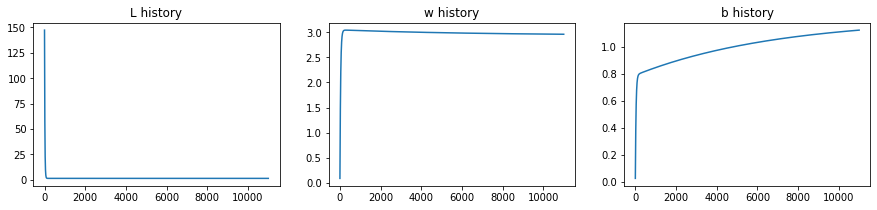

In [30]:
fig=plt.figure(figsize=[15, 3])
ax1=fig.add_subplot(1,3, 1)
ax1.plot(L_history)
ax1.set_title("L history")              
ax2=fig.add_subplot(1,3, 2)
ax2.plot(w_history)
ax2.set_title("w history")              
ax3=fig.add_subplot(1,3, 3)
ax3.plot(b_history)
ax3.set_title("b history")              

**Exercise:**

1. Rerun the gradient descent iterations until the model's $w$ and $b$ parameters match the actual slope and intercept values calculated by stats.linregress
2. Increase / decrease the learning rate as you see fit.  

**Questions:**
1. What happens if eta is too large?  **TODO:** Write answer here
2. What happens if eta is too small?  **TODO:** Write answer here

## Using a Keras "model" to hold $w$ and $b$
Instead of building our own linear model $y=wx+b$ as above, we can use the in-built keras "Dense" layer

- We will use a keras "Dense" layer with 1 input and 1 output.
- This keras dense layer represents a model $y=wx+b$, where $w$ and $b$ are learnable variables.  
    - $w$ is called the "kernel", and $b$ is called the "bias"
    - Note that $w$ is a 1*1 matrix, and $b$ is a length-1 vector.

In [38]:
from tensorflow.keras import layers

class LinearModel(keras.Model):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.layer1=layers.Dense(1)
    def call(self, x):
        return self.layer1(x)
    
keras_linear_model=LinearModel()
print("This is what comes out of the model: ",keras_linear_model(x_train))
print("This is the w value",keras_linear_model.layer1.kernel.numpy())
print("This is the b value",keras_linear_model.layer1.bias.numpy())


This is what comes out of the model:  tf.Tensor(
[[4.983884 ]
 [6.8340473]
 [2.440722 ]
 [4.2842712]
 [3.335244 ]
 [3.0032952]
 [3.5762227]
 [4.5479655]
 [4.8603296]
 [5.7268386]], shape=(10, 1), dtype=float32)
This is the w value [[1.2200121]]
This is the b value [0.]


## Use Keras "fit" for the training loop
- Keras allows us to quickly define the optimizer to use (SGD), and the loss function to use
- It also provides a "fit" function which executes the training loop.

Run and study the following code.

In [39]:
keras_linear_model.compile(
    optimizer=keras.optimizers.SGD(0.01),  # Optimizer
    loss=keras.losses.MeanSquaredError()
)
history = keras_linear_model.fit(
    x_train,
    y_train,
    batch_size=len(x_train),
    epochs=10000,
    verbose=0
)

In [40]:
print("w",keras_linear_model.layer1.kernel.numpy(),"Optimal w:",slope)
print("b",keras_linear_model.layer1.bias.numpy(),"Optimal b:",intercept)


w [[2.9348383]] Optimal w: 2.9348235590433442
b [1.2110937] Optimal b: 1.2111488477281167


## Summary

- We have built this simple model:
<img src="./images/ffnn_single_layer.svg" alt="1-layer FFNN" width="300">
- We've been introduced to Automatic Differntiation, and gradient descent.
- We've also seen the keras Dense layer, the Keras loss functions, optimizer and fit loop

- We'll study all of these more in the next workbook and beyond...